# Project Journey

## Tóm tắt


Nghiên cứu này trình bày một phương pháp luận thực nghiệm nhằm đánh giá và so sánh hai kiến trúc mạng nơ-ron tích chập dựa trên **autoencoder** trong bối cảnh phát hiện bất thường không giám sát. Chúng tôi chọn **U-Net**, một kiến trúc nổi tiếng với khả năng học biểu diễn ngữ cảnh mạnh mẽ, làm mô hình cơ sở. Đối trọng với nó là **Reversed Autoencoder** (RA), một kiến trúc thử nghiệm lấy cảm hứng từ các công trình nghiên cứu tiên tiến gần đây, được thiết kế để học các đặc trưng ngược, tăng cường khả năng tái tạo các cấu trúc bình thường và làm nổi bật các sai lệch.

**Phương pháp thực nghiệm**

Thử nghiệm được tiến hành trên bộ dữ liệu **Chest X-ray Pneumonia** từ **HuggingFace**. Đây là một bộ dữ liệu phù hợp để mô phỏng bài toán phát hiện bất thường lâm sàng, nơi các **trường hợp bất thường (pneumonia)** là ***thiểu số*** và ***không được dán nhãn***.

Hiệu suất của hai mô hình sẽ được đánh giá trên hai khía cạnh:

1. **Đánh giá định lượng: **Chúng tôi sử dụng Diện tích dưới đường cong ROC (AUC) làm chỉ số chính. AUC là một thước đo tổng hợp, robust, đánh giá khả năng phân tách giữa hai lớp (bình thường và bất thường) của mô hình trên toàn bộ các ngưỡng phân loại có thể. Một giá trị AUC cao sẽ chứng minh khả năng học biểu diễn hiệu quả của mô hình.

2. **Đánh giá định tính: **Phân tích trực quan bản đồ lỗi tái tạo (reconstruction error maps) sẽ cung cấp cái nhìn sâu sắc về cách mỗi kiến trúc nhận diện bất thường. Bản đồ này sẽ chỉ ra những vùng hình ảnh mà mô hình gặp khó khăn trong việc tái tạo, thường tương ứng với các dấu hiệu lâm sàng của bệnh lý.

## Giới thiệu & phát biểu vấn đề

Trong bối cảnh y học, việc phát hiện các bất thường trong hình ảnh y khoa là vô cùng quan trọng. Tuy nhiên, nhiệm vụ này thường gặp phải khó khăn do sự **khan hiếm dữ liệu được gán nhãn** chi tiết cho các trường hợp bệnh lý. Đây là lúc các phương pháp **học không giám sát**, đặc biệt là các mô hình dựa trên autoencoder, thể hiện tiềm năng vượt trội của mình.

**Ưu điểm của phương pháp học không giám sát**

Các mô hình autoencoder học cách tái tạo lại dữ liệu đầu vào. Khi được huấn luyện chỉ trên dữ liệu "bình thường" (không có bệnh lý), chúng sẽ học được các đặc điểm và cấu trúc phổ biến của hình ảnh bình thường. Do đó, khi gặp một hình ảnh có bất thường, chúng sẽ không thể tái tạo lại nó một cách chính xác, dẫn đến một lỗi tái tạo lớn.

**So sánh kiến trúc: U-Net vs. Reversed Autoencoder (RA)**

Nghiên cứu này đi sâu vào việc so sánh hiệu suất của hai kiến trúc autoencoder chính:

* **U-Net**: Đây là một kiến trúc tiêu chuẩn và phổ biến trong phân đoạn hình ảnh y tế. Cấu trúc đối xứng của nó, với các kết nối bỏ qua (skip connections), giúp bảo toàn thông tin chi tiết và không gian của hình ảnh.

* **Reversed Autoencoder (RA)**: Lấy cảm hứng từ các nghiên cứu gần đây, RA là một kiến trúc mới nổi được thiết kế đặc biệt để tăng cường khả năng phát hiện bất thường. Bằng cách đảo ngược cấu trúc, nó có thể học các đặc trưng ngược, giúp làm nổi bật các sai lệch so với mô hình "bình thường" đã học.

Việc so sánh này không chỉ giải quyết vấn đề thực tế là **lựa chọn kiến trúc phù hợp** mà còn cung cấp một nền tảng khoa học để hiểu rõ hơn về cách các kiến trúc khác nhau xử lý thông tin trong bối cảnh phát hiện bất thường y tế. Bằng cách so sánh trong một bối cảnh có kiểm soát, nghiên cứu sẽ cung cấp một phân tích định lượng và định tính rõ ràng về hiệu suất của hai phương pháp này.

## Câu hỏi nghiên cứu & giả thuyết

**1. Câu hỏi nghiên cứu**

- **RQ1: U-Net architecture and anomaly detection baseline**
  - Kiến trúc U-Net có thể thiết lập một đường cơ sở (baseline) hiệu quả trong việc phát hiện bất thường hay không? Cụ thể, dựa trên lỗi tái tạo, liệu mô hình này có khả năng phân loại các trường hợp bình thường (NORMAL) và viêm phổi (PNEUMONIA) một cách rõ ràng, với chỉ số AUC (Area Under the Curve) đạt trên 0.80? Câu hỏi này nhằm kiểm tra tính khả thi của một mô hình autoencoder tiêu chuẩn trong nhiệm vụ phát hiện bất thường không giám sát trên dữ liệu y tế.

- **RQ2: Reversed Autoencoder vs U-Net performance**
  - Kiến trúc Reversed Autoencoder (RA), được thiết kế để tái tạo hình ảnh "giả lành tính", có vượt trội hơn so với kiến trúc U-Net tiêu chuẩn về mặt hiệu suất hay không? Hiệu suất được đánh giá thông qua hai tiêu chí: (1) chỉ số AUC và (2) chất lượng của bản đồ lỗi (error map), tức là mức độ tập trung của lỗi tái tạo tại các vùng bất thường.

**2. Giả thuyết**

- **H1: U-Net's effectiveness as a baseline**
  - Chúng tôi giả thuyết rằng mô hình U-Net sẽ đạt được hiệu suất đường cơ sở tốt (AUC > 0.80). Điều này cho thấy rằng, với cấu trúc có các kết nối tắt (skip connections) giúp bảo toàn thông tin không gian, U-Net có đủ khả năng học được các đặc trưng của hình ảnh bình thường và phân biệt chúng một cách hiệu quả với các trường hợp có bất thường.

- **H2: Specialized performance of the reversed autoencoder**
  - Chúng tôi giả thuyết rằng mô hình Reversed Autoencoder (RA), với cơ chế tái tạo chuyên biệt, sẽ tạo ra các bản đồ lỗi có tính khu trú (localized error maps) cao hơn tại các vùng có dấu hiệu viêm phổi. Điều này có nghĩa là lỗi tái tạo sẽ tập trung chính xác hơn tại vị trí của bất thường, mang lại giá trị lâm sàng cao hơn. Tuy nhiên, do thiết kế chuyên biệt này, chỉ số AUC của RA có thể tương đương hoặc thậm chí thấp hơn một chút so với U-Net, vì mô hình tập trung vào việc xác định vị trí bất thường hơn là tối đa hóa khả năng phân loại tổng thể.

# Huấn luyện ImgAE-Dx

This notebook implements T4-optimized training for medical image anomaly detection using HuggingFace datasets.

## Quick Start for HuggingFace Training:
1. Run cells in order, SKIP cell that loads Kaggle/Synthetic data
2. Ensure CONFIG has 'dataset_source': 'huggingface'

## 1. Setup Colab Environment

In [2]:
# Check GPU and mount Google Drive
import torch
import os

# Check GPU
if torch.cuda.is_available():
    gpu_info = !nvidia-smi --query-gpu=name,memory.total --format=csv,noheader
    print(f"GPU: {gpu_info[0]}")
    print(f"CUDA Version: {torch.version.cuda}")
    print(f"PyTorch Version: {torch.__version__}")
else:
    print("⚠️ No GPU detected! Please enable GPU in Runtime > Change runtime type")

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
print("✅ Google Drive mounted")

GPU: Tesla T4, 15360 MiB
CUDA Version: 12.6
PyTorch Version: 2.8.0+cu126
Mounted at /content/drive
✅ Google Drive mounted


## 2. Install ImgAE-Dx

In [3]:
# Clone repository if not exists
if not os.path.exists('/content/ImgAE-Dx'):
    !git clone https://github.com/kinhluan/ImgAE-Dx.git /content/ImgAE-Dx
    %cd /content/ImgAE-Dx
else:
    %cd /content/ImgAE-Dx
    !git pull

# Add the src directory to Python path
import sys
if '/content/ImgAE-Dx/src' not in sys.path:
    sys.path.append('/content/ImgAE-Dx/src')

# Install dependencies
!pip install -e .
!pip install datasets transformers accelerate
!pip install wandb --upgrade

print("✅ ImgAE-Dx installed")

Cloning into '/content/ImgAE-Dx'...
remote: Enumerating objects: 264, done.
remote: Counting objects: 100% (264/264), done.
remote: Compressing objects: 100% (182/182), done.
remote: Total 264 (delta 100), reused 228 (delta 65), pack-reused 0 (from 0)
Receiving objects: 100% (264/264), 481.79 KiB | 8.31 MiB/s, done.
Resolving deltas: 100% (100/100), done.
/content/ImgAE-Dx
Obtaining file:///content/ImgAE-Dx
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of imgae-dx to determine which version is compatible with other requirements. This could take a while.
ERROR: Ignored the following yanked versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3
ERROR: Ignored the following version

## 3. Configuration

In [10]:
# Research-grade T4-optimized configuration (FIXED checkpoint logic)
CONFIG = {
    # Model settings
    'model_type': 'both',  # 'unet', 'reversed_ae', or 'both'

    # Dataset source
    'dataset_source': 'huggingface',

    # HuggingFace Dataset settings
    'hf_dataset': 'hf-vision/chest-xray-pneumonia',
    'hf_config': None,
    'hf_split': 'train',
    'hf_streaming': False,
    'hf_token': None,
    'image_column': 'image',
    'label_column': 'label',

    # Training settings (Research-optimized)
    'samples': 1200,        # Increased for better generalization
    'epochs': 250,          # Sufficient with early stopping
    'batch_size': 16,       # Memory-safe for 2 models
    'learning_rate': 2e-5,  # Stable medical image learning rate
    'image_size': 128,

    # Advanced training features
    'validation_split': 0.25,          # Monitor overfitting
    'early_stopping_patience': 50,     # Prevent overtraining
    'lr_scheduler': 'cosine',          # Better convergence
    'gradient_clip_norm': 0.5,         # Training stability
    'warmup_epochs': 3,                # Gradual learning rate warmup
    'min_lr_factor': 0.0001,           # Minimum LR as factor of initial LR

    # T4 optimizations
    'mixed_precision': True,
    'memory_limit': 16,      # Leave 3GB headroom
    'gradient_accumulation_steps': 4,
    'num_workers': 2,        # Reduced for memory

    # FIXED: Enhanced checkpointing
    'checkpoint_dir': '/content/drive/MyDrive/imgae_dx_enhanced_checkpoints',
    'save_frequency': 5,              # Save every N epochs ✅
    'keep_best_only': False,          # Set True to save ONLY best model (skips regular checkpoints)
    'resume_from_checkpoint': None,   # Path to resume from
    'resume_model_type': None,        # Which model to resume

    # Logging
    'use_wandb': True,
    'wandb_project': 'imgae-dx-enhanced',
    'wandb_run_name': None,
    'log_frequency': 1,              # Log every N batches
}

# Create directories
os.makedirs(CONFIG['checkpoint_dir'], exist_ok=True)
os.makedirs('/content/outputs/logs', exist_ok=True)
os.makedirs('/content/outputs/plots', exist_ok=True)

print("🚀 Enhanced Configuration Set! (FIXED)")
print(f"Model: {CONFIG['model_type']}")
print(f"Samples: {CONFIG['samples']} (with {CONFIG['validation_split']:.1%} validation)")
print(f"Epochs: {CONFIG['epochs']} (early stopping: {CONFIG['early_stopping_patience']})")
print(f"Batch size: {CONFIG['batch_size']}")
print(f"Learning rate: {CONFIG['learning_rate']} (scheduler: {CONFIG['lr_scheduler']})")
print(f"Checkpointing: Every {CONFIG['save_frequency']} epochs {'+ best model' if not CONFIG['keep_best_only'] else '(best only)'}")
print(f"Advanced features: Validation monitoring, Early stopping, LR scheduling, Gradient clipping")

🚀 Enhanced Configuration Set! (FIXED)
Model: both
Samples: 1200 (with 25.0% validation)
Epochs: 250 (early stopping: 50)
Batch size: 16
Learning rate: 2e-05 (scheduler: cosine)
Checkpointing: Every 5 epochs + best model
Advanced features: Validation monitoring, Early stopping, LR scheduling, Gradient clipping


## 4. Setup Weights & Biases (optional)

In [12]:
if CONFIG['use_wandb']:
    import wandb

    # Login to W&B (you'll need to paste your API key)
    wandb.login()

    # Initialize run
    run_name = CONFIG['wandb_run_name'] or f"{CONFIG['model_type']}_t4_{CONFIG['samples']}samples"
    wandb.init(
        project=CONFIG['wandb_project'],
        name=run_name,
        config=CONFIG
    )
    print(f"✅ W&B initialized: {run_name}")
else:
    print("W&B logging disabled")

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


✅ W&B initialized: both_t4_1200samples


## 5. Load HuggingFace Dataset

### Đơn giản

In [ ]:
from datasets import load_dataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# Load dataset
print(f"Loading dataset: {CONFIG['hf_dataset']}...")

try:
    # Authentication if needed
    auth_kwargs = {'use_auth_token': CONFIG['hf_token']} if CONFIG['hf_token'] else {}

    # Load dataset
    dataset = load_dataset(
        CONFIG['hf_dataset'],
        CONFIG['hf_config'],
        split=CONFIG['hf_split'],
        **auth_kwargs
    )

    # Take only the specified number of samples
    if len(dataset) > CONFIG['samples']:
        dataset = dataset.select(range(CONFIG['samples']))

    print(f"✅ Dataset loaded")
    print(f"Dataset features: {dataset.features}")
    print(f"Number of samples: {len(dataset)}")

except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    print("\n📋 Alternative chest X-ray datasets you can try:")
    print("1. 'hf-vision/chest-xray-pneumonia' (default)")
    print("2. 'Francesco/chest-xray-pneumonia'")
    print("3. 'Falah/Chest-X-Ray-Images-Pneumonia'")
    raise

# Define transforms
transform = transforms.Compose([
    transforms.Resize((CONFIG['image_size'], CONFIG['image_size'])),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Custom dataset wrapper
class HFImageDataset(torch.utils.data.Dataset):
    def __init__(self, hf_dataset, transform):
        self.dataset = hf_dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]

        # Get image from the dataset - try different column names
        image = None
        for col in [CONFIG['image_column'], 'image', 'img', 'pixel_values']:
            if col in item:
                image = item[col]
                break

        if image is None:
            raise ValueError(f"No image column found. Available columns: {list(item.keys())}")

        # Convert to PIL if needed
        if not isinstance(image, Image.Image):
            if isinstance(image, np.ndarray):
                image = Image.fromarray(image)
            else:
                image = Image.fromarray(np.array(image))

        # Ensure RGB format for grayscale conversion
        if image.mode != 'RGB':
            image = image.convert('RGB')

        # Apply transforms
        image_tensor = self.transform(image)

        return image_tensor

# Create dataset instance
train_dataset = HFImageDataset(dataset, transform)

# Create dataloader
train_loader = DataLoader(
    train_dataset,
    batch_size=CONFIG['batch_size'],
    shuffle=True,
    num_workers=CONFIG['num_workers'],
    pin_memory=True,
    drop_last=True  # Drop last incomplete batch
)

print(f"✅ DataLoader created with {len(train_dataset)} images")
print(f"Batch size: {CONFIG['batch_size']}")

### Cấu hình nâng cao

In [11]:
from datasets import load_dataset
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

print(f"📂 Loading dataset: {CONFIG['hf_dataset']}...")

try:
    # Authentication if needed
    auth_kwargs = {'use_auth_token': CONFIG['hf_token']} if CONFIG['hf_token'] else {}

    # Load dataset
    dataset = load_dataset(
        CONFIG['hf_dataset'],
        CONFIG['hf_config'],
        split=CONFIG['hf_split'],
        **auth_kwargs
    )

    # Filter for NORMAL images only (label = 0)
    # For unsupervised anomaly detection, we only train on normal images
    normal_dataset = dataset.filter(lambda x: x[CONFIG['label_column']] == 0)
    print(f"📊 Filtered to {len(normal_dataset)} NORMAL images from {len(dataset)} total")

    # Take specified number of samples
    if len(normal_dataset) > CONFIG['samples']:
        normal_dataset = normal_dataset.select(range(CONFIG['samples']))

    print(f"✅ Using {len(normal_dataset)} NORMAL images for training")
    print(f"Dataset features: {normal_dataset.features}")

except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    raise

# Define transforms
transform = transforms.Compose([
    transforms.Resize((CONFIG['image_size'], CONFIG['image_size'])),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Enhanced dataset wrapper
class HFImageDataset(torch.utils.data.Dataset):
    def __init__(self, hf_dataset, transform):
        self.dataset = hf_dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]

        # Get image
        image = None
        for col in [CONFIG['image_column'], 'image', 'img', 'pixel_values']:
            if col in item:
                image = item[col]
                break

        if image is None:
            raise ValueError(f"No image column found. Available: {list(item.keys())}")

        # Convert to PIL if needed
        if not isinstance(image, Image.Image):
            if isinstance(image, np.ndarray):
                image = Image.fromarray(image)
            else:
                image = Image.fromarray(np.array(image))

        if image.mode != 'RGB':
            image = image.convert('RGB')

        return self.transform(image)

# Create full dataset
full_dataset = HFImageDataset(normal_dataset, transform)

# Split into train and validation
val_size = int(CONFIG['validation_split'] * len(full_dataset))
train_size = len(full_dataset) - val_size

train_dataset, val_dataset = random_split(
    full_dataset,
    [train_size, val_size],
    generator=torch.Generator().manual_seed(42)  # Reproducible split
)

print(f"📊 Dataset split:")
print(f"   Training: {len(train_dataset)} images")
print(f"   Validation: {len(val_dataset)} images")

# Create data loaders
train_loader = DataLoader(
    train_dataset,
    batch_size=CONFIG['batch_size'],
    shuffle=True,
    num_workers=CONFIG['num_workers'],
    pin_memory=True,
    drop_last=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=CONFIG['batch_size'],
    shuffle=False,
    num_workers=CONFIG['num_workers'],
    pin_memory=True,
    drop_last=False
)

print(f"✅ DataLoaders created")
print(f"   Train batches: {len(train_loader)}")
print(f"   Validation batches: {len(val_loader)}")

📂 Loading dataset: hf-vision/chest-xray-pneumonia...


Filter:   0%|          | 0/5216 [00:00<?, ? examples/s]

📊 Filtered to 1341 NORMAL images from 5216 total
✅ Using 1200 NORMAL images for training
Dataset features: {'image': Image(mode=None, decode=True), 'label': ClassLabel(names=['NORMAL', 'PNEUMONIA'])}
📊 Dataset split:
   Training: 900 images
   Validation: 300 images
✅ DataLoaders created
   Train batches: 56
   Validation batches: 19


## 6. Initialize Models

### Đơn giản

In [ ]:
from imgae_dx.models import UNet, ReversedAutoencoder
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Model initialization based on config
models_to_train = []

if CONFIG['model_type'] in ['unet', 'both']:
    unet = UNet(
        in_channels=1,
        out_channels=1,
        features=[64, 128, 256, 512]
    ).to(device)
    models_to_train.append(('unet', unet))
    print("✅ U-Net initialized")

if CONFIG['model_type'] in ['reversed_ae', 'both']:
    reversed_ae = ReversedAutoencoder(
        in_channels=1,
        latent_dim=128,
        image_size=CONFIG['image_size']
    ).to(device)
    models_to_train.append(('reversed_ae', reversed_ae))
    print("✅ Reversed Autoencoder initialized")

# Count parameters
for name, model in models_to_train:
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"{name}: {trainable_params:,} trainable parameters")

### Nâng cao

In [13]:
from imgae_dx.models import UNet, ReversedAutoencoder
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Model initialization
models_to_train = []

if CONFIG['model_type'] in ['unet', 'both']:
    unet = UNet(
        in_channels=1,
        out_channels=1,
        features=[64, 128, 256, 512]
    ).to(device)
    models_to_train.append(('unet', unet))
    print("✅ U-Net initialized")

if CONFIG['model_type'] in ['reversed_ae', 'both']:
    reversed_ae = ReversedAutoencoder(
        in_channels=1,
        latent_dim=128,
        image_size=CONFIG['image_size']
    ).to(device)
    models_to_train.append(('reversed_ae', reversed_ae))
    print("✅ Reversed Autoencoder initialized")

# Count parameters
print("\n📊 Model Parameters:")
for name, model in models_to_train:
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"   {name}: {trainable_params:,} trainable parameters")

Using device: cuda
✅ U-Net initialized
✅ Reversed Autoencoder initialized

📊 Model Parameters:
   unet: 54,986,305 trainable parameters
   reversed_ae: 70,406,145 trainable parameters


## 7. T4-Optimized Training

### Đơn giản

In [ ]:
import time
from torch.cuda.amp import GradScaler, autocast
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# T4 optimizations
if torch.cuda.is_available():
    # Enable cuDNN benchmarking for T4
    torch.backends.cudnn.benchmark = True
    torch.backends.cudnn.deterministic = False

    # Set memory fraction
    torch.cuda.set_per_process_memory_fraction(CONFIG['memory_limit'] / 16.0)

    print(f"✅ T4 optimizations enabled")
    print(f"Memory limit: {CONFIG['memory_limit']}GB")

def train_model(model_name, model, train_loader, config):
    """T4-optimized training function"""
    print(f"\n🚀 Training {model_name}...")

    # Setup optimizer and loss
    optimizer = torch.optim.Adam(model.parameters(), lr=config['learning_rate'])
    criterion = nn.MSELoss()

    # Mixed precision setup
    scaler = GradScaler() if config['mixed_precision'] else None

    # Training history
    history = {'train_loss': []}
    best_loss = float('inf')

    # 🔥 RESUME FROM CHECKPOINT
    if config['resume_from_checkpoint'] is not None:
        checkpoint_path = config['resume_from_checkpoint']
        if os.path.exists(checkpoint_path):
            print(f"📂 Loading checkpoint: {checkpoint_path}")
            checkpoint = torch.load(checkpoint_path, map_location=device)

            model.load_state_dict(checkpoint['model_state_dict'])
            optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
            start_epoch = checkpoint['epoch']
            best_loss = checkpoint.get('loss', float('inf'))

            print(f"✅ Resumed from epoch {start_epoch}")
        else:
            print(f"❌ Checkpoint not found: {checkpoint_path}")

    # Training loop
    for epoch in range(config['epochs']):
        model.train()
        epoch_loss = 0
        batch_count = 0

        # Progress bar
        pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{config['epochs']}")

        for batch_idx, images in enumerate(pbar):
            images = images.to(device)

            # Mixed precision training
            if config['mixed_precision']:
                with autocast():
                    reconstructed = model(images)
                    loss = criterion(reconstructed, images)

                # Backward pass with scaler
                optimizer.zero_grad()
                scaler.scale(loss).backward()
                scaler.step(optimizer)
                scaler.update()
            else:
                # Standard training
                reconstructed = model(images)
                loss = criterion(reconstructed, images)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            # Update metrics
            epoch_loss += loss.item()
            batch_count += 1

            # Update progress bar
            pbar.set_postfix({'loss': f'{loss.item():.4f}'})

            # Log to W&B
            if config['use_wandb'] and batch_idx % 10 == 0:
                wandb.log({
                    f'{model_name}_batch_loss': loss.item(),
                    'epoch': epoch,
                    'batch': batch_idx
                })

        # Calculate epoch metrics
        avg_loss = epoch_loss / batch_count
        history['train_loss'].append(avg_loss)

        print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}")

        # Log epoch metrics
        if config['use_wandb']:
            wandb.log({
                f'{model_name}_epoch_loss': avg_loss,
                'epoch': epoch + 1
            })

        # Save checkpoint
        if (epoch + 1) % config['save_frequency'] == 0 or avg_loss < best_loss:
            checkpoint_path = f"{config['checkpoint_dir']}/{model_name}_epoch_{epoch+1}.pth"
            torch.save({
                'epoch': epoch + 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': avg_loss,
                'config': config
            }, checkpoint_path)

            if avg_loss < best_loss:
                best_loss = avg_loss
                # Save best model
                best_path = f"{config['checkpoint_dir']}/{model_name}_best.pth"
                torch.save(model.state_dict(), best_path)
                print(f"✅ Best model saved: {best_path}")

    return model, history

# Train models
all_histories = {}
trained_models = {}

for model_name, model in models_to_train:
    start_time = time.time()

    # Train model
    trained_model, history = train_model(model_name, model, train_loader, CONFIG)

    # Store results
    trained_models[model_name] = trained_model
    all_histories[model_name] = history

    # Calculate training time
    training_time = (time.time() - start_time) / 60
    print(f"\n✅ {model_name} training completed in {training_time:.1f} minutes")

    # Clear cache between models
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

### Nâng cao

In [14]:
import time
import math
from torch.cuda.amp import GradScaler, autocast
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch.nn.utils as torch_utils

# T4 optimizations
if torch.cuda.is_available():
    torch.backends.cudnn.benchmark = True
    torch.backends.cudnn.deterministic = False
    torch.cuda.set_per_process_memory_fraction(CONFIG['memory_limit'] / 16.0)
    print(f"✅ T4 optimizations enabled (Memory: {CONFIG['memory_limit']}GB)")

class EarlyStopping:
    """Early stopping utility class"""
    def __init__(self, patience=8, min_delta=0.0001):
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = float('inf')
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        return self.early_stop

def cosine_warmup_scheduler(optimizer, warmup_epochs, total_epochs, min_lr_factor=0.1):
    """Create cosine annealing scheduler with warmup"""
    initial_lr = optimizer.param_groups[0]['lr']
    min_lr = initial_lr * min_lr_factor

    def lr_lambda(epoch):
        if epoch < warmup_epochs:
            # Warmup phase: linear increase from min_lr to initial_lr
            return min_lr_factor + (1 - min_lr_factor) * epoch / warmup_epochs
        else:
            # Cosine annealing phase
            progress = (epoch - warmup_epochs) / (total_epochs - warmup_epochs)
            return min_lr_factor + (1 - min_lr_factor) * 0.5 * (1 + math.cos(math.pi * progress))

    return torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

def validate_model(model, val_loader, criterion, device):
    """Validate model on validation set"""
    model.eval()
    val_loss = 0.0
    val_batches = 0

    with torch.no_grad():
        for images in val_loader:
            images = images.to(device)

            if CONFIG['mixed_precision']:
                with autocast():
                    reconstructed = model(images)
                    loss = criterion(reconstructed, images)
            else:
                reconstructed = model(images)
                loss = criterion(reconstructed, images)

            val_loss += loss.item()
            val_batches += 1

    return val_loss / val_batches if val_batches > 0 else float('inf')

def enhanced_train_model(model_name, model, train_loader, val_loader, config):
    """Enhanced training function with FIXED checkpoint logic and gradient accumulation"""
    print(f"\n🚀 Enhanced Training: {model_name}")
    print(f"   Features: Validation monitoring, Early stopping, LR scheduling, Gradient clipping")
    print(f"   Gradient Accumulation: {config['gradient_accumulation_steps']} steps")
    print(f"   Checkpointing: Every {config['save_frequency']} epochs {'+ best model' if not config['keep_best_only'] else '(best only)'}")

    # Setup optimizer and loss
    optimizer = torch.optim.Adam(model.parameters(), lr=config['learning_rate'])
    criterion = nn.MSELoss()

    # Mixed precision setup
    scaler = GradScaler() if config['mixed_precision'] else None

    # Learning rate scheduler
    if config['lr_scheduler'] == 'cosine':
        scheduler = cosine_warmup_scheduler(
            optimizer,
            config['warmup_epochs'],
            config['epochs'],
            config['min_lr_factor']
        )
    else:
        scheduler = None

    # Early stopping
    early_stopping = EarlyStopping(patience=config['early_stopping_patience'])

    # Training history
    history = {
        'train_loss': [],
        'val_loss': [],
        'learning_rate': []
    }

    # Resume from checkpoint if specified
    start_epoch = 0
    best_val_loss = float('inf')

    if (config.get('resume_from_checkpoint') and
        config.get('resume_model_type') == model_name):

        print(f"📂 Resuming {model_name} from checkpoint...")
        try:
            checkpoint = torch.load(config['resume_from_checkpoint'], map_location=device)

            if 'model_state_dict' in checkpoint:
                model.load_state_dict(checkpoint['model_state_dict'])
                optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
                start_epoch = checkpoint['epoch']
                best_val_loss = checkpoint.get('val_loss', float('inf'))
                if 'history' in checkpoint:
                    history = checkpoint['history']
                print(f"✅ Resumed from epoch {start_epoch}, best val loss: {best_val_loss:.4f}")
            else:
                model.load_state_dict(checkpoint)
                print(f"✅ Loaded model weights, starting fresh training")
        except Exception as e:
            print(f"⚠️ Could not resume: {e}. Starting fresh...")

    # Training loop with gradient accumulation
    accumulation_steps = config['gradient_accumulation_steps']

    for epoch in range(start_epoch, config['epochs']):
        # Training phase
        model.train()
        train_loss = 0.0
        train_batches = 0
        accumulated_batches = 0

        # Get current learning rate
        current_lr = optimizer.param_groups[0]['lr']

        pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{config['epochs']} [LR: {current_lr:.2e}]")

        # Zero gradients at the start
        optimizer.zero_grad()

        for batch_idx, images in enumerate(pbar):
            images = images.to(device)

            # Forward pass with mixed precision
            if config['mixed_precision']:
                with autocast():
                    reconstructed = model(images)
                    loss = criterion(reconstructed, images)
                    # Scale loss by accumulation steps
                    loss = loss / accumulation_steps

                # Backward pass
                scaler.scale(loss).backward()

                # Update weights every accumulation_steps batches
                if (batch_idx + 1) % accumulation_steps == 0 or (batch_idx + 1) == len(train_loader):
                    if config.get('gradient_clip_norm'):
                        scaler.unscale_(optimizer)
                        torch_utils.clip_grad_norm_(model.parameters(), config['gradient_clip_norm'])

                    scaler.step(optimizer)
                    scaler.update()
                    optimizer.zero_grad()
                    accumulated_batches += 1
            else:
                reconstructed = model(images)
                loss = criterion(reconstructed, images)
                # Scale loss by accumulation steps
                loss = loss / accumulation_steps

                loss.backward()

                # Update weights every accumulation_steps batches
                if (batch_idx + 1) % accumulation_steps == 0 or (batch_idx + 1) == len(train_loader):
                    if config.get('gradient_clip_norm'):
                        torch_utils.clip_grad_norm_(model.parameters(), config['gradient_clip_norm'])

                    optimizer.step()
                    optimizer.zero_grad()
                    accumulated_batches += 1

            # Update metrics (use unscaled loss for tracking)
            train_loss += loss.item() * accumulation_steps
            train_batches += 1

            # Update progress bar
            pbar.set_postfix({
                'loss': f'{loss.item() * accumulation_steps:.4f}',
                'avg_loss': f'{train_loss/train_batches:.4f}',
                'accum': f'{(batch_idx % accumulation_steps) + 1}/{accumulation_steps}'
            })

            # Log to W&B
            if config['use_wandb'] and batch_idx % config.get('log_frequency', 10) == 0:
                wandb.log({
                    f'{model_name}_batch_loss': loss.item() * accumulation_steps,
                    f'{model_name}_learning_rate': current_lr,
                    'epoch': epoch,
                    'batch': batch_idx
                })

        # Calculate epoch metrics
        avg_train_loss = train_loss / train_batches

        # Validation phase
        avg_val_loss = validate_model(model, val_loader, criterion, device)

        # Update history
        history['train_loss'].append(avg_train_loss)
        history['val_loss'].append(avg_val_loss)
        history['learning_rate'].append(current_lr)

        print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Val Loss = {avg_val_loss:.4f}, LR = {current_lr:.2e}")

        # Log epoch metrics
        if config['use_wandb']:
            wandb.log({
                f'{model_name}_train_loss': avg_train_loss,
                f'{model_name}_val_loss': avg_val_loss,
                f'{model_name}_learning_rate': current_lr,
                'epoch': epoch + 1
            })

        # Update learning rate
        if scheduler:
            scheduler.step()

        # FIXED: Checkpoint saving logic
        is_best_model = False
        is_regular_save = (epoch + 1) % config['save_frequency'] == 0

        # Check if this is the best model so far
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            is_best_model = True

            # Always save best model
            best_path = f"{config['checkpoint_dir']}/{model_name}_best.pth"
            torch.save(model.state_dict(), best_path)
            print(f"✅ Best model saved: {best_path} (Val Loss: {best_val_loss:.4f})")

        # Save regular checkpoint based on save_frequency
        if is_regular_save:
            if config.get('keep_best_only', False):
                print(f"⏭️ Epoch {epoch+1}: Regular checkpoint skipped (keep_best_only=True)")
            else:
                checkpoint_path = f"{config['checkpoint_dir']}/{model_name}_epoch_{epoch+1}.pth"
                torch.save({
                    'epoch': epoch + 1,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'train_loss': avg_train_loss,
                    'val_loss': avg_val_loss,
                    'history': history,
                    'config': config
                }, checkpoint_path)
                print(f"💾 Regular checkpoint saved: {checkpoint_path}")

        # Early stopping check
        if early_stopping(avg_val_loss):
            print(f"🛑 Early stopping triggered at epoch {epoch+1}")
            break

    return model, history

# Train models
all_histories = {}
trained_models = {}

print(f"🚀 Starting enhanced training for {len(models_to_train)} model(s)...")
print(f"💾 Checkpoint strategy: {'Best model only' if CONFIG['keep_best_only'] else f'Every {CONFIG["save_frequency"]} epochs + best model'}")

for model_name, model in models_to_train:
    start_time = time.time()

    # Enhanced training
    trained_model, history = enhanced_train_model(
        model_name, model, train_loader, val_loader, CONFIG
    )

    # Store results
    trained_models[model_name] = trained_model
    all_histories[model_name] = history

    # Calculate training time
    training_time = (time.time() - start_time) / 60
    print(f"\n✅ {model_name} enhanced training completed in {training_time:.1f} minutes")

    # Clear cache between models
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

print(f"\n🎉 All models trained successfully with FIXED checkpoint logic and gradient accumulation!")

✅ T4 optimizations enabled (Memory: 16GB)
🚀 Starting enhanced training for 2 model(s)...
💾 Checkpoint strategy: Every 5 epochs + best model

🚀 Enhanced Training: unet
   Features: Validation monitoring, Early stopping, LR scheduling, Gradient clipping
   Gradient Accumulation: 4 steps
   Checkpointing: Every 5 epochs + best model


/tmp/ipython-input-1326478829.py:85: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler() if config['mixed_precision'] else None


Epoch 1/250 [LR: 2.00e-09]:   0%|          | 0/56 [00:00<?, ?it/s]

/tmp/ipython-input-1326478829.py:156: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipython-input-1326478829.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 1: Train Loss = 0.7766, Val Loss = 0.5751, LR = 2.00e-09
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.5751)


Epoch 2/250 [LR: 6.67e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 2: Train Loss = 0.7008, Val Loss = 0.4978, LR = 6.67e-06
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.4978)


Epoch 3/250 [LR: 1.33e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 3: Train Loss = 0.4918, Val Loss = 0.3291, LR = 1.33e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.3291)


Epoch 4/250 [LR: 2.00e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 4: Train Loss = 0.3197, Val Loss = 0.2589, LR = 2.00e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.2589)


Epoch 5/250 [LR: 2.00e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 5: Train Loss = 0.2498, Val Loss = 0.2266, LR = 2.00e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.2266)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_5.pth


Epoch 6/250 [LR: 2.00e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 6: Train Loss = 0.2237, Val Loss = 0.2118, LR = 2.00e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.2118)


Epoch 7/250 [LR: 2.00e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 7: Train Loss = 0.2138, Val Loss = 0.2040, LR = 2.00e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.2040)


Epoch 8/250 [LR: 2.00e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 8: Train Loss = 0.2078, Val Loss = 0.1971, LR = 2.00e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1971)


Epoch 9/250 [LR: 2.00e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 9: Train Loss = 0.2035, Val Loss = 0.1925, LR = 2.00e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1925)


Epoch 10/250 [LR: 2.00e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 10: Train Loss = 0.1996, Val Loss = 0.1876, LR = 2.00e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1876)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_10.pth


Epoch 11/250 [LR: 2.00e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 11: Train Loss = 0.1960, Val Loss = 0.1836, LR = 2.00e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1836)


Epoch 12/250 [LR: 1.99e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 12: Train Loss = 0.1926, Val Loss = 0.1796, LR = 1.99e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1796)


Epoch 13/250 [LR: 1.99e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 13: Train Loss = 0.1891, Val Loss = 0.1766, LR = 1.99e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1766)


Epoch 14/250 [LR: 1.99e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 14: Train Loss = 0.1856, Val Loss = 0.1718, LR = 1.99e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1718)


Epoch 15/250 [LR: 1.99e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 15: Train Loss = 0.1825, Val Loss = 0.1700, LR = 1.99e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1700)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_15.pth


Epoch 16/250 [LR: 1.99e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 16: Train Loss = 0.1794, Val Loss = 0.1692, LR = 1.99e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1692)


Epoch 17/250 [LR: 1.99e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 17: Train Loss = 0.1772, Val Loss = 0.1663, LR = 1.99e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1663)


Epoch 18/250 [LR: 1.98e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 18: Train Loss = 0.1746, Val Loss = 0.1650, LR = 1.98e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1650)


Epoch 19/250 [LR: 1.98e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 19: Train Loss = 0.1731, Val Loss = 0.1639, LR = 1.98e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1639)


Epoch 20/250 [LR: 1.98e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 20: Train Loss = 0.1709, Val Loss = 0.1635, LR = 1.98e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1635)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_20.pth


Epoch 21/250 [LR: 1.98e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 21: Train Loss = 0.1694, Val Loss = 0.1629, LR = 1.98e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1629)


Epoch 22/250 [LR: 1.97e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 22: Train Loss = 0.1682, Val Loss = 0.1618, LR = 1.97e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1618)


Epoch 23/250 [LR: 1.97e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 23: Train Loss = 0.1675, Val Loss = 0.1624, LR = 1.97e-05


Epoch 24/250 [LR: 1.97e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 24: Train Loss = 0.1666, Val Loss = 0.1616, LR = 1.97e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1616)


Epoch 25/250 [LR: 1.96e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

/tmp/ipython-input-1326478829.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 25: Train Loss = 0.1659, Val Loss = 0.1615, LR = 1.96e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1615)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_25.pth


Epoch 26/250 [LR: 1.96e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

/tmp/ipython-input-1326478829.py:156: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipython-input-1326478829.py:156: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipython-input-1326478829.py:156: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipython-input-1326478829.py:156: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipython-input-1326478829.py:156: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipython-input-1326478829.py:156: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecate

Epoch 26: Train Loss = 0.1651, Val Loss = 0.1604, LR = 1.96e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1604)


Epoch 27/250 [LR: 1.96e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

/tmp/ipython-input-1326478829.py:156: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 27: Train Loss = 0.1643, Val Loss = 0.1608, LR = 1.96e-05


Epoch 28/250 [LR: 1.95e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 28: Train Loss = 0.1637, Val Loss = 0.1603, LR = 1.95e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1603)


Epoch 29/250 [LR: 1.95e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 29: Train Loss = 0.1637, Val Loss = 0.1599, LR = 1.95e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1599)


Epoch 30/250 [LR: 1.95e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 30: Train Loss = 0.1630, Val Loss = 0.1595, LR = 1.95e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1595)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_30.pth


Epoch 31/250 [LR: 1.94e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 31: Train Loss = 0.1626, Val Loss = 0.1597, LR = 1.94e-05


Epoch 32/250 [LR: 1.94e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 32: Train Loss = 0.1623, Val Loss = 0.1593, LR = 1.94e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1593)


Epoch 33/250 [LR: 1.93e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 33: Train Loss = 0.1618, Val Loss = 0.1597, LR = 1.93e-05


Epoch 34/250 [LR: 1.93e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 34: Train Loss = 0.1617, Val Loss = 0.1589, LR = 1.93e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1589)


Epoch 35/250 [LR: 1.92e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 35: Train Loss = 0.1614, Val Loss = 0.1594, LR = 1.92e-05
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_35.pth


Epoch 36/250 [LR: 1.92e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 36: Train Loss = 0.1613, Val Loss = 0.1587, LR = 1.92e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1587)


Epoch 37/250 [LR: 1.91e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 37: Train Loss = 0.1611, Val Loss = 0.1588, LR = 1.91e-05


Epoch 38/250 [LR: 1.91e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 38: Train Loss = 0.1609, Val Loss = 0.1587, LR = 1.91e-05


Epoch 39/250 [LR: 1.90e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 39: Train Loss = 0.1604, Val Loss = 0.1588, LR = 1.90e-05


Epoch 40/250 [LR: 1.90e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 40: Train Loss = 0.1605, Val Loss = 0.1587, LR = 1.90e-05
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_40.pth


Epoch 41/250 [LR: 1.89e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 41: Train Loss = 0.1605, Val Loss = 0.1585, LR = 1.89e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1585)


Epoch 42/250 [LR: 1.89e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 42: Train Loss = 0.1599, Val Loss = 0.1587, LR = 1.89e-05


Epoch 43/250 [LR: 1.88e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 43: Train Loss = 0.1608, Val Loss = 0.1586, LR = 1.88e-05


Epoch 44/250 [LR: 1.87e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 44: Train Loss = 0.1602, Val Loss = 0.1580, LR = 1.87e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1580)


Epoch 45/250 [LR: 1.87e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 45: Train Loss = 0.1598, Val Loss = 0.1583, LR = 1.87e-05
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_45.pth


Epoch 46/250 [LR: 1.86e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 46: Train Loss = 0.1598, Val Loss = 0.1583, LR = 1.86e-05


Epoch 47/250 [LR: 1.85e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 47: Train Loss = 0.1595, Val Loss = 0.1580, LR = 1.85e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1580)


Epoch 48/250 [LR: 1.85e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 48: Train Loss = 0.1594, Val Loss = 0.1581, LR = 1.85e-05


Epoch 49/250 [LR: 1.84e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 49: Train Loss = 0.1592, Val Loss = 0.1579, LR = 1.84e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1579)


Epoch 50/250 [LR: 1.83e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 50: Train Loss = 0.1595, Val Loss = 0.1583, LR = 1.83e-05
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_50.pth


Epoch 51/250 [LR: 1.83e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 51: Train Loss = 0.1593, Val Loss = 0.1578, LR = 1.83e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1578)


Epoch 52/250 [LR: 1.82e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 52: Train Loss = 0.1592, Val Loss = 0.1578, LR = 1.82e-05


Epoch 53/250 [LR: 1.81e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 53: Train Loss = 0.1592, Val Loss = 0.1578, LR = 1.81e-05


Epoch 54/250 [LR: 1.80e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 54: Train Loss = 0.1592, Val Loss = 0.1580, LR = 1.80e-05


Epoch 55/250 [LR: 1.80e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 55: Train Loss = 0.1590, Val Loss = 0.1575, LR = 1.80e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1575)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_55.pth


Epoch 56/250 [LR: 1.79e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 56: Train Loss = 0.1587, Val Loss = 0.1577, LR = 1.79e-05


Epoch 57/250 [LR: 1.78e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 57: Train Loss = 0.1604, Val Loss = 0.1577, LR = 1.78e-05


Epoch 58/250 [LR: 1.77e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 58: Train Loss = 0.1589, Val Loss = 0.1575, LR = 1.77e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1575)


Epoch 59/250 [LR: 1.77e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 59: Train Loss = 0.1588, Val Loss = 0.1574, LR = 1.77e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1574)


Epoch 60/250 [LR: 1.76e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 60: Train Loss = 0.1588, Val Loss = 0.1576, LR = 1.76e-05
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_60.pth


Epoch 61/250 [LR: 1.75e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 61: Train Loss = 0.1586, Val Loss = 0.1574, LR = 1.75e-05


Epoch 62/250 [LR: 1.74e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 62: Train Loss = 0.1586, Val Loss = 0.1576, LR = 1.74e-05


Epoch 63/250 [LR: 1.73e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 63: Train Loss = 0.1584, Val Loss = 0.1574, LR = 1.73e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1574)


Epoch 64/250 [LR: 1.72e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 64: Train Loss = 0.1584, Val Loss = 0.1577, LR = 1.72e-05


Epoch 65/250 [LR: 1.71e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 65: Train Loss = 0.1586, Val Loss = 0.1574, LR = 1.71e-05
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_65.pth


Epoch 66/250 [LR: 1.70e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 66: Train Loss = 0.1582, Val Loss = 0.1573, LR = 1.70e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1573)


Epoch 67/250 [LR: 1.70e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 67: Train Loss = 0.1583, Val Loss = 0.1574, LR = 1.70e-05


Epoch 68/250 [LR: 1.69e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 68: Train Loss = 0.1585, Val Loss = 0.1573, LR = 1.69e-05


Epoch 69/250 [LR: 1.68e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 69: Train Loss = 0.1584, Val Loss = 0.1572, LR = 1.68e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1572)


Epoch 70/250 [LR: 1.67e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 70: Train Loss = 0.1584, Val Loss = 0.1574, LR = 1.67e-05
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_70.pth


Epoch 71/250 [LR: 1.66e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 71: Train Loss = 0.1584, Val Loss = 0.1572, LR = 1.66e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1572)


Epoch 72/250 [LR: 1.65e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 72: Train Loss = 0.1584, Val Loss = 0.1573, LR = 1.65e-05


Epoch 73/250 [LR: 1.64e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 73: Train Loss = 0.1581, Val Loss = 0.1573, LR = 1.64e-05


Epoch 74/250 [LR: 1.63e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 74: Train Loss = 0.1581, Val Loss = 0.1573, LR = 1.63e-05


Epoch 75/250 [LR: 1.62e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 75: Train Loss = 0.1582, Val Loss = 0.1571, LR = 1.62e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1571)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_75.pth


Epoch 76/250 [LR: 1.61e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 76: Train Loss = 0.1581, Val Loss = 0.1574, LR = 1.61e-05


Epoch 77/250 [LR: 1.60e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 77: Train Loss = 0.1581, Val Loss = 0.1573, LR = 1.60e-05


Epoch 78/250 [LR: 1.59e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 78: Train Loss = 0.1580, Val Loss = 0.1574, LR = 1.59e-05


Epoch 79/250 [LR: 1.58e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 79: Train Loss = 0.1580, Val Loss = 0.1573, LR = 1.58e-05


Epoch 80/250 [LR: 1.57e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 80: Train Loss = 0.1583, Val Loss = 0.1572, LR = 1.57e-05
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_80.pth


Epoch 81/250 [LR: 1.56e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 81: Train Loss = 0.1581, Val Loss = 0.1572, LR = 1.56e-05


Epoch 82/250 [LR: 1.55e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 82: Train Loss = 0.1587, Val Loss = 0.1575, LR = 1.55e-05


Epoch 83/250 [LR: 1.54e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 83: Train Loss = 0.1578, Val Loss = 0.1573, LR = 1.54e-05


Epoch 84/250 [LR: 1.53e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 84: Train Loss = 0.1582, Val Loss = 0.1574, LR = 1.53e-05


Epoch 85/250 [LR: 1.51e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 85: Train Loss = 0.1577, Val Loss = 0.1571, LR = 1.51e-05
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_85.pth


Epoch 86/250 [LR: 1.50e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 86: Train Loss = 0.1581, Val Loss = 0.1572, LR = 1.50e-05


Epoch 87/250 [LR: 1.49e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 87: Train Loss = 0.1578, Val Loss = 0.1573, LR = 1.49e-05


Epoch 88/250 [LR: 1.48e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 88: Train Loss = 0.1577, Val Loss = 0.1572, LR = 1.48e-05


Epoch 89/250 [LR: 1.47e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 89: Train Loss = 0.1576, Val Loss = 0.1571, LR = 1.47e-05


Epoch 90/250 [LR: 1.46e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 90: Train Loss = 0.1577, Val Loss = 0.1571, LR = 1.46e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1571)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_90.pth


Epoch 91/250 [LR: 1.45e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 91: Train Loss = 0.1580, Val Loss = 0.1571, LR = 1.45e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1571)


Epoch 92/250 [LR: 1.44e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 92: Train Loss = 0.1577, Val Loss = 0.1573, LR = 1.44e-05


Epoch 93/250 [LR: 1.42e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 93: Train Loss = 0.1576, Val Loss = 0.1572, LR = 1.42e-05


Epoch 94/250 [LR: 1.41e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 94: Train Loss = 0.1579, Val Loss = 0.1570, LR = 1.41e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1570)


Epoch 95/250 [LR: 1.40e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 95: Train Loss = 0.1576, Val Loss = 0.1572, LR = 1.40e-05
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_95.pth


Epoch 96/250 [LR: 1.39e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 96: Train Loss = 0.1577, Val Loss = 0.1573, LR = 1.39e-05


Epoch 97/250 [LR: 1.38e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 97: Train Loss = 0.1576, Val Loss = 0.1572, LR = 1.38e-05


Epoch 98/250 [LR: 1.37e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 98: Train Loss = 0.1578, Val Loss = 0.1573, LR = 1.37e-05


Epoch 99/250 [LR: 1.35e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 99: Train Loss = 0.1576, Val Loss = 0.1572, LR = 1.35e-05


Epoch 100/250 [LR: 1.34e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 100: Train Loss = 0.1578, Val Loss = 0.1571, LR = 1.34e-05
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_100.pth


Epoch 101/250 [LR: 1.33e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 101: Train Loss = 0.1576, Val Loss = 0.1572, LR = 1.33e-05


Epoch 102/250 [LR: 1.32e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 102: Train Loss = 0.1572, Val Loss = 0.1571, LR = 1.32e-05


Epoch 103/250 [LR: 1.31e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 103: Train Loss = 0.1575, Val Loss = 0.1573, LR = 1.31e-05


Epoch 104/250 [LR: 1.29e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 104: Train Loss = 0.1575, Val Loss = 0.1571, LR = 1.29e-05


Epoch 105/250 [LR: 1.28e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 105: Train Loss = 0.1575, Val Loss = 0.1572, LR = 1.28e-05
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_105.pth


Epoch 106/250 [LR: 1.27e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 106: Train Loss = 0.1577, Val Loss = 0.1571, LR = 1.27e-05


Epoch 107/250 [LR: 1.26e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 107: Train Loss = 0.1576, Val Loss = 0.1573, LR = 1.26e-05


Epoch 108/250 [LR: 1.25e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 108: Train Loss = 0.1574, Val Loss = 0.1570, LR = 1.25e-05


Epoch 109/250 [LR: 1.23e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 109: Train Loss = 0.1577, Val Loss = 0.1572, LR = 1.23e-05


Epoch 110/250 [LR: 1.22e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 110: Train Loss = 0.1575, Val Loss = 0.1571, LR = 1.22e-05
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_110.pth


Epoch 111/250 [LR: 1.21e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 111: Train Loss = 0.1578, Val Loss = 0.1572, LR = 1.21e-05


Epoch 112/250 [LR: 1.20e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 112: Train Loss = 0.1574, Val Loss = 0.1571, LR = 1.20e-05


Epoch 113/250 [LR: 1.18e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 113: Train Loss = 0.1573, Val Loss = 0.1571, LR = 1.18e-05


Epoch 114/250 [LR: 1.17e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 114: Train Loss = 0.1574, Val Loss = 0.1571, LR = 1.17e-05


Epoch 115/250 [LR: 1.16e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 115: Train Loss = 0.1576, Val Loss = 0.1571, LR = 1.16e-05
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_115.pth


Epoch 116/250 [LR: 1.15e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 116: Train Loss = 0.1574, Val Loss = 0.1570, LR = 1.15e-05


Epoch 117/250 [LR: 1.13e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 117: Train Loss = 0.1573, Val Loss = 0.1572, LR = 1.13e-05


Epoch 118/250 [LR: 1.12e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 118: Train Loss = 0.1575, Val Loss = 0.1572, LR = 1.12e-05


Epoch 119/250 [LR: 1.11e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 119: Train Loss = 0.1576, Val Loss = 0.1572, LR = 1.11e-05


Epoch 120/250 [LR: 1.10e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 120: Train Loss = 0.1574, Val Loss = 0.1572, LR = 1.10e-05
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_120.pth


Epoch 121/250 [LR: 1.08e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 121: Train Loss = 0.1575, Val Loss = 0.1570, LR = 1.08e-05


Epoch 122/250 [LR: 1.07e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 122: Train Loss = 0.1576, Val Loss = 0.1571, LR = 1.07e-05


Epoch 123/250 [LR: 1.06e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 123: Train Loss = 0.1573, Val Loss = 0.1569, LR = 1.06e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1569)


Epoch 124/250 [LR: 1.04e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 124: Train Loss = 0.1573, Val Loss = 0.1570, LR = 1.04e-05


Epoch 125/250 [LR: 1.03e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 125: Train Loss = 0.1573, Val Loss = 0.1569, LR = 1.03e-05
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_125.pth


Epoch 126/250 [LR: 1.02e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 126: Train Loss = 0.1573, Val Loss = 0.1570, LR = 1.02e-05


Epoch 127/250 [LR: 1.01e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 127: Train Loss = 0.1573, Val Loss = 0.1571, LR = 1.01e-05


Epoch 128/250 [LR: 9.94e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 128: Train Loss = 0.1573, Val Loss = 0.1570, LR = 9.94e-06


Epoch 129/250 [LR: 9.81e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 129: Train Loss = 0.1572, Val Loss = 0.1570, LR = 9.81e-06


Epoch 130/250 [LR: 9.68e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 130: Train Loss = 0.1572, Val Loss = 0.1570, LR = 9.68e-06
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_130.pth


Epoch 131/250 [LR: 9.56e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 131: Train Loss = 0.1571, Val Loss = 0.1569, LR = 9.56e-06
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth (Val Loss: 0.1569)


Epoch 132/250 [LR: 9.43e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 132: Train Loss = 0.1574, Val Loss = 0.1571, LR = 9.43e-06


Epoch 133/250 [LR: 9.30e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 133: Train Loss = 0.1572, Val Loss = 0.1571, LR = 9.30e-06


Epoch 134/250 [LR: 9.18e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 134: Train Loss = 0.1574, Val Loss = 0.1569, LR = 9.18e-06


Epoch 135/250 [LR: 9.05e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 135: Train Loss = 0.1572, Val Loss = 0.1571, LR = 9.05e-06
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_135.pth


Epoch 136/250 [LR: 8.92e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 136: Train Loss = 0.1574, Val Loss = 0.1569, LR = 8.92e-06


Epoch 137/250 [LR: 8.80e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 137: Train Loss = 0.1574, Val Loss = 0.1574, LR = 8.80e-06


Epoch 138/250 [LR: 8.67e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 138: Train Loss = 0.1571, Val Loss = 0.1570, LR = 8.67e-06


Epoch 139/250 [LR: 8.54e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 139: Train Loss = 0.1571, Val Loss = 0.1570, LR = 8.54e-06


Epoch 140/250 [LR: 8.42e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 140: Train Loss = 0.1574, Val Loss = 0.1570, LR = 8.42e-06
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_epoch_140.pth


Epoch 141/250 [LR: 8.29e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 141: Train Loss = 0.1574, Val Loss = 0.1571, LR = 8.29e-06


Epoch 142/250 [LR: 8.17e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 142: Train Loss = 0.1573, Val Loss = 0.1570, LR = 8.17e-06


Epoch 143/250 [LR: 8.04e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 143: Train Loss = 0.1571, Val Loss = 0.1571, LR = 8.04e-06


Epoch 144/250 [LR: 7.92e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 144: Train Loss = 0.1572, Val Loss = 0.1570, LR = 7.92e-06
🛑 Early stopping triggered at epoch 144

✅ unet enhanced training completed in 40.5 minutes

🚀 Enhanced Training: reversed_ae
   Features: Validation monitoring, Early stopping, LR scheduling, Gradient clipping
   Gradient Accumulation: 4 steps
   Checkpointing: Every 5 epochs + best model


/tmp/ipython-input-1326478829.py:85: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler() if config['mixed_precision'] else None


Epoch 1/250 [LR: 2.00e-09]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 1: Train Loss = 0.5836, Val Loss = 0.6642, LR = 2.00e-09
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.6642)


Epoch 2/250 [LR: 6.67e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 2: Train Loss = 0.5283, Val Loss = 0.4240, LR = 6.67e-06
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.4240)


Epoch 3/250 [LR: 1.33e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 3: Train Loss = 0.3821, Val Loss = 0.2770, LR = 1.33e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.2770)


Epoch 4/250 [LR: 2.00e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 4: Train Loss = 0.2859, Val Loss = 0.2439, LR = 2.00e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.2439)


Epoch 5/250 [LR: 2.00e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 5: Train Loss = 0.2542, Val Loss = 0.2348, LR = 2.00e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.2348)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_5.pth


Epoch 6/250 [LR: 2.00e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 6: Train Loss = 0.2439, Val Loss = 0.2310, LR = 2.00e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.2310)


Epoch 7/250 [LR: 2.00e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 7: Train Loss = 0.2391, Val Loss = 0.2276, LR = 2.00e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.2276)


Epoch 8/250 [LR: 2.00e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 8: Train Loss = 0.2360, Val Loss = 0.2249, LR = 2.00e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.2249)


Epoch 9/250 [LR: 2.00e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 9: Train Loss = 0.2335, Val Loss = 0.2227, LR = 2.00e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.2227)


Epoch 10/250 [LR: 2.00e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 10: Train Loss = 0.2311, Val Loss = 0.2208, LR = 2.00e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.2208)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_10.pth


Epoch 11/250 [LR: 2.00e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 11: Train Loss = 0.2294, Val Loss = 0.2193, LR = 2.00e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.2193)


Epoch 12/250 [LR: 1.99e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 12: Train Loss = 0.2278, Val Loss = 0.2176, LR = 1.99e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.2176)


Epoch 13/250 [LR: 1.99e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 13: Train Loss = 0.2260, Val Loss = 0.2158, LR = 1.99e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.2158)


Epoch 14/250 [LR: 1.99e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 14: Train Loss = 0.2245, Val Loss = 0.2143, LR = 1.99e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.2143)


Epoch 15/250 [LR: 1.99e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 15: Train Loss = 0.2224, Val Loss = 0.2120, LR = 1.99e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.2120)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_15.pth


Epoch 16/250 [LR: 1.99e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 16: Train Loss = 0.2203, Val Loss = 0.2097, LR = 1.99e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.2097)


Epoch 17/250 [LR: 1.99e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 17: Train Loss = 0.2179, Val Loss = 0.2074, LR = 1.99e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.2074)


Epoch 18/250 [LR: 1.98e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 18: Train Loss = 0.2155, Val Loss = 0.2055, LR = 1.98e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.2055)


Epoch 19/250 [LR: 1.98e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 19: Train Loss = 0.2131, Val Loss = 0.2031, LR = 1.98e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.2031)


Epoch 20/250 [LR: 1.98e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 20: Train Loss = 0.2102, Val Loss = 0.2003, LR = 1.98e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.2003)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_20.pth


Epoch 21/250 [LR: 1.98e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 21: Train Loss = 0.2074, Val Loss = 0.1978, LR = 1.98e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1978)


Epoch 22/250 [LR: 1.97e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 22: Train Loss = 0.2033, Val Loss = 0.1950, LR = 1.97e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1950)


Epoch 23/250 [LR: 1.97e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 23: Train Loss = 0.2007, Val Loss = 0.1926, LR = 1.97e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1926)


Epoch 24/250 [LR: 1.97e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 24: Train Loss = 0.1976, Val Loss = 0.1905, LR = 1.97e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1905)


Epoch 25/250 [LR: 1.96e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 25: Train Loss = 0.1947, Val Loss = 0.1883, LR = 1.96e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1883)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_25.pth


Epoch 26/250 [LR: 1.96e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 26: Train Loss = 0.1924, Val Loss = 0.1867, LR = 1.96e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1867)


Epoch 27/250 [LR: 1.96e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 27: Train Loss = 0.1902, Val Loss = 0.1852, LR = 1.96e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1852)


Epoch 28/250 [LR: 1.95e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 28: Train Loss = 0.1881, Val Loss = 0.1837, LR = 1.95e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1837)


Epoch 29/250 [LR: 1.95e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 29: Train Loss = 0.1863, Val Loss = 0.1824, LR = 1.95e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1824)


Epoch 30/250 [LR: 1.95e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 30: Train Loss = 0.1846, Val Loss = 0.1812, LR = 1.95e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1812)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_30.pth


Epoch 31/250 [LR: 1.94e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 31: Train Loss = 0.1833, Val Loss = 0.1802, LR = 1.94e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1802)


Epoch 32/250 [LR: 1.94e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 32: Train Loss = 0.1821, Val Loss = 0.1793, LR = 1.94e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1793)


Epoch 33/250 [LR: 1.93e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 33: Train Loss = 0.1810, Val Loss = 0.1782, LR = 1.93e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1782)


Epoch 34/250 [LR: 1.93e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 34: Train Loss = 0.1800, Val Loss = 0.1775, LR = 1.93e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1775)


Epoch 35/250 [LR: 1.92e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 35: Train Loss = 0.1789, Val Loss = 0.1767, LR = 1.92e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1767)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_35.pth


Epoch 36/250 [LR: 1.92e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 36: Train Loss = 0.1781, Val Loss = 0.1762, LR = 1.92e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1762)


Epoch 37/250 [LR: 1.91e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 37: Train Loss = 0.1773, Val Loss = 0.1757, LR = 1.91e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1757)


Epoch 38/250 [LR: 1.91e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 38: Train Loss = 0.1770, Val Loss = 0.1752, LR = 1.91e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1752)


Epoch 39/250 [LR: 1.90e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 39: Train Loss = 0.1764, Val Loss = 0.1749, LR = 1.90e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1749)


Epoch 40/250 [LR: 1.90e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 40: Train Loss = 0.1760, Val Loss = 0.1747, LR = 1.90e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1747)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_40.pth


Epoch 41/250 [LR: 1.89e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 41: Train Loss = 0.1756, Val Loss = 0.1746, LR = 1.89e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1746)


Epoch 42/250 [LR: 1.89e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 42: Train Loss = 0.1752, Val Loss = 0.1741, LR = 1.89e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1741)


Epoch 43/250 [LR: 1.88e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 43: Train Loss = 0.1748, Val Loss = 0.1736, LR = 1.88e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1736)


Epoch 44/250 [LR: 1.87e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 44: Train Loss = 0.1746, Val Loss = 0.1735, LR = 1.87e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1735)


Epoch 45/250 [LR: 1.87e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 45: Train Loss = 0.1744, Val Loss = 0.1732, LR = 1.87e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1732)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_45.pth


Epoch 46/250 [LR: 1.86e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 46: Train Loss = 0.1739, Val Loss = 0.1730, LR = 1.86e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1730)


Epoch 47/250 [LR: 1.85e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 47: Train Loss = 0.1736, Val Loss = 0.1729, LR = 1.85e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1729)


Epoch 48/250 [LR: 1.85e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 48: Train Loss = 0.1733, Val Loss = 0.1726, LR = 1.85e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1726)


Epoch 49/250 [LR: 1.84e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 49: Train Loss = 0.1731, Val Loss = 0.1722, LR = 1.84e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1722)


Epoch 50/250 [LR: 1.83e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 50: Train Loss = 0.1729, Val Loss = 0.1723, LR = 1.83e-05
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_50.pth


Epoch 51/250 [LR: 1.83e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 51: Train Loss = 0.1726, Val Loss = 0.1721, LR = 1.83e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1721)


Epoch 52/250 [LR: 1.82e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 52: Train Loss = 0.1725, Val Loss = 0.1720, LR = 1.82e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1720)


Epoch 53/250 [LR: 1.81e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 53: Train Loss = 0.1721, Val Loss = 0.1717, LR = 1.81e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1717)


Epoch 54/250 [LR: 1.80e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 54: Train Loss = 0.1722, Val Loss = 0.1717, LR = 1.80e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1717)


Epoch 55/250 [LR: 1.80e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 55: Train Loss = 0.1720, Val Loss = 0.1717, LR = 1.80e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1717)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_55.pth


Epoch 56/250 [LR: 1.79e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 56: Train Loss = 0.1717, Val Loss = 0.1713, LR = 1.79e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1713)


Epoch 57/250 [LR: 1.78e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 57: Train Loss = 0.1716, Val Loss = 0.1712, LR = 1.78e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1712)


Epoch 58/250 [LR: 1.77e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 58: Train Loss = 0.1713, Val Loss = 0.1711, LR = 1.77e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1711)


Epoch 59/250 [LR: 1.77e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 59: Train Loss = 0.1710, Val Loss = 0.1713, LR = 1.77e-05


Epoch 60/250 [LR: 1.76e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 60: Train Loss = 0.1711, Val Loss = 0.1711, LR = 1.76e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1711)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_60.pth


Epoch 61/250 [LR: 1.75e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 61: Train Loss = 0.1709, Val Loss = 0.1710, LR = 1.75e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1710)


Epoch 62/250 [LR: 1.74e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 62: Train Loss = 0.1709, Val Loss = 0.1707, LR = 1.74e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1707)


Epoch 63/250 [LR: 1.73e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 63: Train Loss = 0.1707, Val Loss = 0.1708, LR = 1.73e-05


Epoch 64/250 [LR: 1.72e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 64: Train Loss = 0.1707, Val Loss = 0.1705, LR = 1.72e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1705)


Epoch 65/250 [LR: 1.71e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 65: Train Loss = 0.1704, Val Loss = 0.1705, LR = 1.71e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1705)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_65.pth


Epoch 66/250 [LR: 1.70e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 66: Train Loss = 0.1703, Val Loss = 0.1704, LR = 1.70e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1704)


Epoch 67/250 [LR: 1.70e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 67: Train Loss = 0.1699, Val Loss = 0.1704, LR = 1.70e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1704)


Epoch 68/250 [LR: 1.69e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 68: Train Loss = 0.1700, Val Loss = 0.1702, LR = 1.69e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1702)


Epoch 69/250 [LR: 1.68e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 69: Train Loss = 0.1701, Val Loss = 0.1702, LR = 1.68e-05


Epoch 70/250 [LR: 1.67e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 70: Train Loss = 0.1698, Val Loss = 0.1701, LR = 1.67e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1701)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_70.pth


Epoch 71/250 [LR: 1.66e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 71: Train Loss = 0.1698, Val Loss = 0.1703, LR = 1.66e-05


Epoch 72/250 [LR: 1.65e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 72: Train Loss = 0.1699, Val Loss = 0.1699, LR = 1.65e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1699)


Epoch 73/250 [LR: 1.64e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 73: Train Loss = 0.1699, Val Loss = 0.1702, LR = 1.64e-05


Epoch 74/250 [LR: 1.63e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 74: Train Loss = 0.1696, Val Loss = 0.1700, LR = 1.63e-05


Epoch 75/250 [LR: 1.62e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 75: Train Loss = 0.1695, Val Loss = 0.1698, LR = 1.62e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1698)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_75.pth


Epoch 76/250 [LR: 1.61e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 76: Train Loss = 0.1693, Val Loss = 0.1698, LR = 1.61e-05


Epoch 77/250 [LR: 1.60e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 77: Train Loss = 0.1692, Val Loss = 0.1698, LR = 1.60e-05


Epoch 78/250 [LR: 1.59e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 78: Train Loss = 0.1693, Val Loss = 0.1696, LR = 1.59e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1696)


Epoch 79/250 [LR: 1.58e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 79: Train Loss = 0.1689, Val Loss = 0.1698, LR = 1.58e-05


Epoch 80/250 [LR: 1.57e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 80: Train Loss = 0.1688, Val Loss = 0.1697, LR = 1.57e-05
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_80.pth


Epoch 81/250 [LR: 1.56e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 81: Train Loss = 0.1690, Val Loss = 0.1695, LR = 1.56e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1695)


Epoch 82/250 [LR: 1.55e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 82: Train Loss = 0.1688, Val Loss = 0.1696, LR = 1.55e-05


Epoch 83/250 [LR: 1.54e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 83: Train Loss = 0.1687, Val Loss = 0.1696, LR = 1.54e-05


Epoch 84/250 [LR: 1.53e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 84: Train Loss = 0.1688, Val Loss = 0.1696, LR = 1.53e-05


Epoch 85/250 [LR: 1.51e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 85: Train Loss = 0.1686, Val Loss = 0.1695, LR = 1.51e-05
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_85.pth


Epoch 86/250 [LR: 1.50e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 86: Train Loss = 0.1685, Val Loss = 0.1696, LR = 1.50e-05


Epoch 87/250 [LR: 1.49e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 87: Train Loss = 0.1684, Val Loss = 0.1694, LR = 1.49e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1694)


Epoch 88/250 [LR: 1.48e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 88: Train Loss = 0.1683, Val Loss = 0.1692, LR = 1.48e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1692)


Epoch 89/250 [LR: 1.47e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 89: Train Loss = 0.1682, Val Loss = 0.1693, LR = 1.47e-05


Epoch 90/250 [LR: 1.46e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 90: Train Loss = 0.1682, Val Loss = 0.1690, LR = 1.46e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1690)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_90.pth


Epoch 91/250 [LR: 1.45e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 91: Train Loss = 0.1681, Val Loss = 0.1691, LR = 1.45e-05


Epoch 92/250 [LR: 1.44e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 92: Train Loss = 0.1681, Val Loss = 0.1690, LR = 1.44e-05


Epoch 93/250 [LR: 1.42e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 93: Train Loss = 0.1682, Val Loss = 0.1694, LR = 1.42e-05


Epoch 94/250 [LR: 1.41e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 94: Train Loss = 0.1679, Val Loss = 0.1692, LR = 1.41e-05


Epoch 95/250 [LR: 1.40e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 95: Train Loss = 0.1679, Val Loss = 0.1691, LR = 1.40e-05
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_95.pth


Epoch 96/250 [LR: 1.39e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 96: Train Loss = 0.1679, Val Loss = 0.1688, LR = 1.39e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1688)


Epoch 97/250 [LR: 1.38e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 97: Train Loss = 0.1679, Val Loss = 0.1692, LR = 1.38e-05


Epoch 98/250 [LR: 1.37e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 98: Train Loss = 0.1680, Val Loss = 0.1690, LR = 1.37e-05


Epoch 99/250 [LR: 1.35e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 99: Train Loss = 0.1676, Val Loss = 0.1690, LR = 1.35e-05


Epoch 100/250 [LR: 1.34e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 100: Train Loss = 0.1677, Val Loss = 0.1688, LR = 1.34e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1688)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_100.pth


Epoch 101/250 [LR: 1.33e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 101: Train Loss = 0.1677, Val Loss = 0.1689, LR = 1.33e-05


Epoch 102/250 [LR: 1.32e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 102: Train Loss = 0.1677, Val Loss = 0.1687, LR = 1.32e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1687)


Epoch 103/250 [LR: 1.31e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 103: Train Loss = 0.1674, Val Loss = 0.1687, LR = 1.31e-05


Epoch 104/250 [LR: 1.29e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 104: Train Loss = 0.1673, Val Loss = 0.1688, LR = 1.29e-05


Epoch 105/250 [LR: 1.28e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 105: Train Loss = 0.1674, Val Loss = 0.1689, LR = 1.28e-05
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_105.pth


Epoch 106/250 [LR: 1.27e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 106: Train Loss = 0.1673, Val Loss = 0.1688, LR = 1.27e-05


Epoch 107/250 [LR: 1.26e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 107: Train Loss = 0.1676, Val Loss = 0.1690, LR = 1.26e-05


Epoch 108/250 [LR: 1.25e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 108: Train Loss = 0.1674, Val Loss = 0.1685, LR = 1.25e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1685)


Epoch 109/250 [LR: 1.23e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 109: Train Loss = 0.1672, Val Loss = 0.1686, LR = 1.23e-05


Epoch 110/250 [LR: 1.22e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 110: Train Loss = 0.1672, Val Loss = 0.1689, LR = 1.22e-05
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_110.pth


Epoch 111/250 [LR: 1.21e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 111: Train Loss = 0.1673, Val Loss = 0.1686, LR = 1.21e-05


Epoch 112/250 [LR: 1.20e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 112: Train Loss = 0.1670, Val Loss = 0.1684, LR = 1.20e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1684)


Epoch 113/250 [LR: 1.18e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 113: Train Loss = 0.1670, Val Loss = 0.1685, LR = 1.18e-05


Epoch 114/250 [LR: 1.17e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 114: Train Loss = 0.1672, Val Loss = 0.1683, LR = 1.17e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1683)


Epoch 115/250 [LR: 1.16e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 115: Train Loss = 0.1672, Val Loss = 0.1684, LR = 1.16e-05
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_115.pth


Epoch 116/250 [LR: 1.15e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 116: Train Loss = 0.1668, Val Loss = 0.1684, LR = 1.15e-05


Epoch 117/250 [LR: 1.13e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 117: Train Loss = 0.1668, Val Loss = 0.1683, LR = 1.13e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1683)


Epoch 118/250 [LR: 1.12e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 118: Train Loss = 0.1668, Val Loss = 0.1686, LR = 1.12e-05


Epoch 119/250 [LR: 1.11e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 119: Train Loss = 0.1668, Val Loss = 0.1683, LR = 1.11e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1683)


Epoch 120/250 [LR: 1.10e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 120: Train Loss = 0.1668, Val Loss = 0.1683, LR = 1.10e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1683)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_120.pth


Epoch 121/250 [LR: 1.08e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 121: Train Loss = 0.1669, Val Loss = 0.1683, LR = 1.08e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1683)


Epoch 122/250 [LR: 1.07e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 122: Train Loss = 0.1668, Val Loss = 0.1684, LR = 1.07e-05


Epoch 123/250 [LR: 1.06e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 123: Train Loss = 0.1670, Val Loss = 0.1683, LR = 1.06e-05


Epoch 124/250 [LR: 1.04e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 124: Train Loss = 0.1666, Val Loss = 0.1683, LR = 1.04e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1683)


Epoch 125/250 [LR: 1.03e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 125: Train Loss = 0.1666, Val Loss = 0.1683, LR = 1.03e-05
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_125.pth


Epoch 126/250 [LR: 1.02e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 126: Train Loss = 0.1664, Val Loss = 0.1683, LR = 1.02e-05


Epoch 127/250 [LR: 1.01e-05]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 127: Train Loss = 0.1666, Val Loss = 0.1682, LR = 1.01e-05
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1682)


Epoch 128/250 [LR: 9.94e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 128: Train Loss = 0.1664, Val Loss = 0.1682, LR = 9.94e-06


Epoch 129/250 [LR: 9.81e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 129: Train Loss = 0.1665, Val Loss = 0.1684, LR = 9.81e-06


Epoch 130/250 [LR: 9.68e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 130: Train Loss = 0.1665, Val Loss = 0.1681, LR = 9.68e-06
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1681)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_130.pth


Epoch 131/250 [LR: 9.56e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 131: Train Loss = 0.1667, Val Loss = 0.1681, LR = 9.56e-06
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1681)


Epoch 132/250 [LR: 9.43e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 132: Train Loss = 0.1664, Val Loss = 0.1684, LR = 9.43e-06


Epoch 133/250 [LR: 9.30e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 133: Train Loss = 0.1666, Val Loss = 0.1682, LR = 9.30e-06


Epoch 134/250 [LR: 9.18e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 134: Train Loss = 0.1665, Val Loss = 0.1681, LR = 9.18e-06


Epoch 135/250 [LR: 9.05e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 135: Train Loss = 0.1665, Val Loss = 0.1682, LR = 9.05e-06
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_135.pth


Epoch 136/250 [LR: 8.92e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 136: Train Loss = 0.1664, Val Loss = 0.1680, LR = 8.92e-06
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1680)


Epoch 137/250 [LR: 8.80e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 137: Train Loss = 0.1664, Val Loss = 0.1681, LR = 8.80e-06


Epoch 138/250 [LR: 8.67e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 138: Train Loss = 0.1664, Val Loss = 0.1682, LR = 8.67e-06


Epoch 139/250 [LR: 8.54e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 139: Train Loss = 0.1662, Val Loss = 0.1680, LR = 8.54e-06
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1680)


Epoch 140/250 [LR: 8.42e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 140: Train Loss = 0.1663, Val Loss = 0.1680, LR = 8.42e-06
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1680)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_140.pth


Epoch 141/250 [LR: 8.29e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 141: Train Loss = 0.1664, Val Loss = 0.1680, LR = 8.29e-06


Epoch 142/250 [LR: 8.17e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 142: Train Loss = 0.1660, Val Loss = 0.1678, LR = 8.17e-06
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1678)


Epoch 143/250 [LR: 8.04e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 143: Train Loss = 0.1661, Val Loss = 0.1678, LR = 8.04e-06


Epoch 144/250 [LR: 7.92e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 144: Train Loss = 0.1660, Val Loss = 0.1681, LR = 7.92e-06


Epoch 145/250 [LR: 7.79e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 145: Train Loss = 0.1659, Val Loss = 0.1677, LR = 7.79e-06
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1677)
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_145.pth


Epoch 146/250 [LR: 7.67e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 146: Train Loss = 0.1660, Val Loss = 0.1678, LR = 7.67e-06


Epoch 147/250 [LR: 7.55e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 147: Train Loss = 0.1661, Val Loss = 0.1680, LR = 7.55e-06


Epoch 148/250 [LR: 7.42e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 148: Train Loss = 0.1659, Val Loss = 0.1678, LR = 7.42e-06


Epoch 149/250 [LR: 7.30e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 149: Train Loss = 0.1660, Val Loss = 0.1680, LR = 7.30e-06


Epoch 150/250 [LR: 7.18e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 150: Train Loss = 0.1659, Val Loss = 0.1678, LR = 7.18e-06
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_150.pth


Epoch 151/250 [LR: 7.06e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 151: Train Loss = 0.1659, Val Loss = 0.1678, LR = 7.06e-06


Epoch 152/250 [LR: 6.94e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 152: Train Loss = 0.1660, Val Loss = 0.1680, LR = 6.94e-06


Epoch 153/250 [LR: 6.81e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 153: Train Loss = 0.1659, Val Loss = 0.1678, LR = 6.81e-06


Epoch 154/250 [LR: 6.69e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 154: Train Loss = 0.1659, Val Loss = 0.1680, LR = 6.69e-06


Epoch 155/250 [LR: 6.57e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 155: Train Loss = 0.1658, Val Loss = 0.1679, LR = 6.57e-06
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_155.pth


Epoch 156/250 [LR: 6.46e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 156: Train Loss = 0.1657, Val Loss = 0.1679, LR = 6.46e-06


Epoch 157/250 [LR: 6.34e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 157: Train Loss = 0.1658, Val Loss = 0.1679, LR = 6.34e-06


Epoch 158/250 [LR: 6.22e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 158: Train Loss = 0.1657, Val Loss = 0.1676, LR = 6.22e-06
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1676)


Epoch 159/250 [LR: 6.10e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 159: Train Loss = 0.1656, Val Loss = 0.1677, LR = 6.10e-06


Epoch 160/250 [LR: 5.98e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 160: Train Loss = 0.1655, Val Loss = 0.1677, LR = 5.98e-06
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_160.pth


Epoch 161/250 [LR: 5.87e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 161: Train Loss = 0.1657, Val Loss = 0.1678, LR = 5.87e-06


Epoch 162/250 [LR: 5.75e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 162: Train Loss = 0.1656, Val Loss = 0.1677, LR = 5.75e-06


Epoch 163/250 [LR: 5.64e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 163: Train Loss = 0.1657, Val Loss = 0.1678, LR = 5.64e-06


Epoch 164/250 [LR: 5.52e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 164: Train Loss = 0.1656, Val Loss = 0.1680, LR = 5.52e-06


Epoch 165/250 [LR: 5.41e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 165: Train Loss = 0.1654, Val Loss = 0.1677, LR = 5.41e-06
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_165.pth


Epoch 166/250 [LR: 5.30e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 166: Train Loss = 0.1657, Val Loss = 0.1679, LR = 5.30e-06


Epoch 167/250 [LR: 5.19e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 167: Train Loss = 0.1654, Val Loss = 0.1676, LR = 5.19e-06
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1676)


Epoch 168/250 [LR: 5.08e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 168: Train Loss = 0.1655, Val Loss = 0.1677, LR = 5.08e-06


Epoch 169/250 [LR: 4.96e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 169: Train Loss = 0.1655, Val Loss = 0.1677, LR = 4.96e-06


Epoch 170/250 [LR: 4.86e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 170: Train Loss = 0.1656, Val Loss = 0.1677, LR = 4.86e-06
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_170.pth


Epoch 171/250 [LR: 4.75e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 171: Train Loss = 0.1655, Val Loss = 0.1677, LR = 4.75e-06


Epoch 172/250 [LR: 4.64e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 172: Train Loss = 0.1657, Val Loss = 0.1676, LR = 4.64e-06


Epoch 173/250 [LR: 4.53e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 173: Train Loss = 0.1653, Val Loss = 0.1675, LR = 4.53e-06
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1675)


Epoch 174/250 [LR: 4.43e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 174: Train Loss = 0.1653, Val Loss = 0.1678, LR = 4.43e-06


Epoch 175/250 [LR: 4.32e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 175: Train Loss = 0.1655, Val Loss = 0.1679, LR = 4.32e-06
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_175.pth


Epoch 176/250 [LR: 4.22e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 176: Train Loss = 0.1654, Val Loss = 0.1675, LR = 4.22e-06
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1675)


Epoch 177/250 [LR: 4.11e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 177: Train Loss = 0.1652, Val Loss = 0.1676, LR = 4.11e-06


Epoch 178/250 [LR: 4.01e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 178: Train Loss = 0.1653, Val Loss = 0.1677, LR = 4.01e-06


Epoch 179/250 [LR: 3.91e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 179: Train Loss = 0.1655, Val Loss = 0.1678, LR = 3.91e-06


Epoch 180/250 [LR: 3.81e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 180: Train Loss = 0.1654, Val Loss = 0.1677, LR = 3.81e-06
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_180.pth


Epoch 181/250 [LR: 3.71e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 181: Train Loss = 0.1654, Val Loss = 0.1676, LR = 3.71e-06


Epoch 182/250 [LR: 3.61e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 182: Train Loss = 0.1654, Val Loss = 0.1676, LR = 3.61e-06


Epoch 183/250 [LR: 3.51e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 183: Train Loss = 0.1652, Val Loss = 0.1675, LR = 3.51e-06


Epoch 184/250 [LR: 3.42e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 184: Train Loss = 0.1653, Val Loss = 0.1675, LR = 3.42e-06
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1675)


Epoch 185/250 [LR: 3.32e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 185: Train Loss = 0.1654, Val Loss = 0.1676, LR = 3.32e-06
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_185.pth


Epoch 186/250 [LR: 3.23e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 186: Train Loss = 0.1653, Val Loss = 0.1675, LR = 3.23e-06


Epoch 187/250 [LR: 3.14e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 187: Train Loss = 0.1653, Val Loss = 0.1675, LR = 3.14e-06


Epoch 188/250 [LR: 3.04e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 188: Train Loss = 0.1653, Val Loss = 0.1676, LR = 3.04e-06


Epoch 189/250 [LR: 2.95e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 189: Train Loss = 0.1655, Val Loss = 0.1675, LR = 2.95e-06
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1675)


Epoch 190/250 [LR: 2.86e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 190: Train Loss = 0.1655, Val Loss = 0.1675, LR = 2.86e-06
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_190.pth


Epoch 191/250 [LR: 2.78e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 191: Train Loss = 0.1653, Val Loss = 0.1675, LR = 2.78e-06


Epoch 192/250 [LR: 2.69e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 192: Train Loss = 0.1651, Val Loss = 0.1676, LR = 2.69e-06


Epoch 193/250 [LR: 2.60e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 193: Train Loss = 0.1651, Val Loss = 0.1676, LR = 2.60e-06


Epoch 194/250 [LR: 2.52e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 194: Train Loss = 0.1651, Val Loss = 0.1677, LR = 2.52e-06


Epoch 195/250 [LR: 2.43e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 195: Train Loss = 0.1652, Val Loss = 0.1675, LR = 2.43e-06
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_195.pth


Epoch 196/250 [LR: 2.35e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 196: Train Loss = 0.1653, Val Loss = 0.1677, LR = 2.35e-06


Epoch 197/250 [LR: 2.27e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 197: Train Loss = 0.1652, Val Loss = 0.1675, LR = 2.27e-06
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1675)


Epoch 198/250 [LR: 2.19e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 198: Train Loss = 0.1651, Val Loss = 0.1675, LR = 2.19e-06


Epoch 199/250 [LR: 2.11e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 199: Train Loss = 0.1652, Val Loss = 0.1675, LR = 2.11e-06


Epoch 200/250 [LR: 2.03e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 200: Train Loss = 0.1650, Val Loss = 0.1676, LR = 2.03e-06
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_200.pth


Epoch 201/250 [LR: 1.96e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 201: Train Loss = 0.1652, Val Loss = 0.1675, LR = 1.96e-06


Epoch 202/250 [LR: 1.88e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 202: Train Loss = 0.1651, Val Loss = 0.1675, LR = 1.88e-06


Epoch 203/250 [LR: 1.81e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 203: Train Loss = 0.1651, Val Loss = 0.1677, LR = 1.81e-06


Epoch 204/250 [LR: 1.74e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 204: Train Loss = 0.1652, Val Loss = 0.1674, LR = 1.74e-06
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1674)


Epoch 205/250 [LR: 1.67e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 205: Train Loss = 0.1651, Val Loss = 0.1676, LR = 1.67e-06
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_205.pth


Epoch 206/250 [LR: 1.60e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 206: Train Loss = 0.1653, Val Loss = 0.1676, LR = 1.60e-06


Epoch 207/250 [LR: 1.53e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 207: Train Loss = 0.1650, Val Loss = 0.1677, LR = 1.53e-06


Epoch 208/250 [LR: 1.46e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 208: Train Loss = 0.1650, Val Loss = 0.1674, LR = 1.46e-06
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1674)


Epoch 209/250 [LR: 1.40e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 209: Train Loss = 0.1650, Val Loss = 0.1674, LR = 1.40e-06


Epoch 210/250 [LR: 1.33e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 210: Train Loss = 0.1651, Val Loss = 0.1674, LR = 1.33e-06
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_210.pth


Epoch 211/250 [LR: 1.27e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 211: Train Loss = 0.1652, Val Loss = 0.1676, LR = 1.27e-06


Epoch 212/250 [LR: 1.21e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 212: Train Loss = 0.1651, Val Loss = 0.1675, LR = 1.21e-06


Epoch 213/250 [LR: 1.15e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 213: Train Loss = 0.1650, Val Loss = 0.1674, LR = 1.15e-06
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1674)


Epoch 214/250 [LR: 1.09e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 214: Train Loss = 0.1650, Val Loss = 0.1675, LR = 1.09e-06


Epoch 215/250 [LR: 1.03e-06]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 215: Train Loss = 0.1650, Val Loss = 0.1675, LR = 1.03e-06
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_215.pth


Epoch 216/250 [LR: 9.77e-07]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 216: Train Loss = 0.1649, Val Loss = 0.1675, LR = 9.77e-07


Epoch 217/250 [LR: 9.22e-07]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 217: Train Loss = 0.1651, Val Loss = 0.1675, LR = 9.22e-07


Epoch 218/250 [LR: 8.70e-07]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 218: Train Loss = 0.1652, Val Loss = 0.1675, LR = 8.70e-07


Epoch 219/250 [LR: 8.19e-07]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 219: Train Loss = 0.1651, Val Loss = 0.1675, LR = 8.19e-07


Epoch 220/250 [LR: 7.69e-07]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 220: Train Loss = 0.1653, Val Loss = 0.1674, LR = 7.69e-07
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_220.pth


Epoch 221/250 [LR: 7.21e-07]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 221: Train Loss = 0.1652, Val Loss = 0.1674, LR = 7.21e-07


Epoch 222/250 [LR: 6.75e-07]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 222: Train Loss = 0.1651, Val Loss = 0.1675, LR = 6.75e-07


Epoch 223/250 [LR: 6.29e-07]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 223: Train Loss = 0.1648, Val Loss = 0.1674, LR = 6.29e-07


Epoch 224/250 [LR: 5.86e-07]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 224: Train Loss = 0.1649, Val Loss = 0.1674, LR = 5.86e-07
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1674)


Epoch 225/250 [LR: 5.44e-07]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 225: Train Loss = 0.1651, Val Loss = 0.1674, LR = 5.44e-07
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_225.pth


Epoch 226/250 [LR: 5.03e-07]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 226: Train Loss = 0.1651, Val Loss = 0.1673, LR = 5.03e-07
✅ Best model saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth (Val Loss: 0.1673)


Epoch 227/250 [LR: 4.64e-07]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 227: Train Loss = 0.1651, Val Loss = 0.1673, LR = 4.64e-07


Epoch 228/250 [LR: 4.27e-07]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 228: Train Loss = 0.1651, Val Loss = 0.1678, LR = 4.27e-07


Epoch 229/250 [LR: 3.91e-07]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 229: Train Loss = 0.1649, Val Loss = 0.1676, LR = 3.91e-07


Epoch 230/250 [LR: 3.57e-07]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 230: Train Loss = 0.1651, Val Loss = 0.1674, LR = 3.57e-07
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_230.pth


Epoch 231/250 [LR: 3.24e-07]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 231: Train Loss = 0.1651, Val Loss = 0.1675, LR = 3.24e-07


Epoch 232/250 [LR: 2.93e-07]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 232: Train Loss = 0.1652, Val Loss = 0.1674, LR = 2.93e-07


Epoch 233/250 [LR: 2.63e-07]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 233: Train Loss = 0.1651, Val Loss = 0.1678, LR = 2.63e-07


Epoch 234/250 [LR: 2.35e-07]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 234: Train Loss = 0.1649, Val Loss = 0.1673, LR = 2.35e-07


Epoch 235/250 [LR: 2.08e-07]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 235: Train Loss = 0.1649, Val Loss = 0.1675, LR = 2.08e-07
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_235.pth


Epoch 236/250 [LR: 1.83e-07]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 236: Train Loss = 0.1653, Val Loss = 0.1675, LR = 1.83e-07


Epoch 237/250 [LR: 1.60e-07]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 237: Train Loss = 0.1651, Val Loss = 0.1675, LR = 1.60e-07


Epoch 238/250 [LR: 1.38e-07]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 238: Train Loss = 0.1653, Val Loss = 0.1674, LR = 1.38e-07


Epoch 239/250 [LR: 1.18e-07]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 239: Train Loss = 0.1651, Val Loss = 0.1675, LR = 1.18e-07


Epoch 240/250 [LR: 9.97e-08]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 240: Train Loss = 0.1651, Val Loss = 0.1675, LR = 9.97e-08
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_240.pth


Epoch 241/250 [LR: 8.28e-08]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 241: Train Loss = 0.1649, Val Loss = 0.1674, LR = 8.28e-08


Epoch 242/250 [LR: 6.74e-08]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 242: Train Loss = 0.1653, Val Loss = 0.1674, LR = 6.74e-08


Epoch 243/250 [LR: 5.37e-08]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 243: Train Loss = 0.1652, Val Loss = 0.1675, LR = 5.37e-08


Epoch 244/250 [LR: 4.16e-08]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 244: Train Loss = 0.1651, Val Loss = 0.1673, LR = 4.16e-08


Epoch 245/250 [LR: 3.11e-08]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 245: Train Loss = 0.1652, Val Loss = 0.1675, LR = 3.11e-08
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_245.pth


Epoch 246/250 [LR: 2.22e-08]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 246: Train Loss = 0.1650, Val Loss = 0.1674, LR = 2.22e-08


Epoch 247/250 [LR: 1.49e-08]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 247: Train Loss = 0.1651, Val Loss = 0.1675, LR = 1.49e-08


Epoch 248/250 [LR: 9.28e-09]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 248: Train Loss = 0.1645, Val Loss = 0.1674, LR = 9.28e-09


Epoch 249/250 [LR: 5.23e-09]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 249: Train Loss = 0.1649, Val Loss = 0.1674, LR = 5.23e-09


Epoch 250/250 [LR: 2.81e-09]:   0%|          | 0/56 [00:00<?, ?it/s]

Epoch 250: Train Loss = 0.1650, Val Loss = 0.1674, LR = 2.81e-09
💾 Regular checkpoint saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_epoch_250.pth

✅ reversed_ae enhanced training completed in 69.5 minutes

🎉 All models trained successfully with FIXED checkpoint logic and gradient accumulation!


## 8. Visualize Training Results

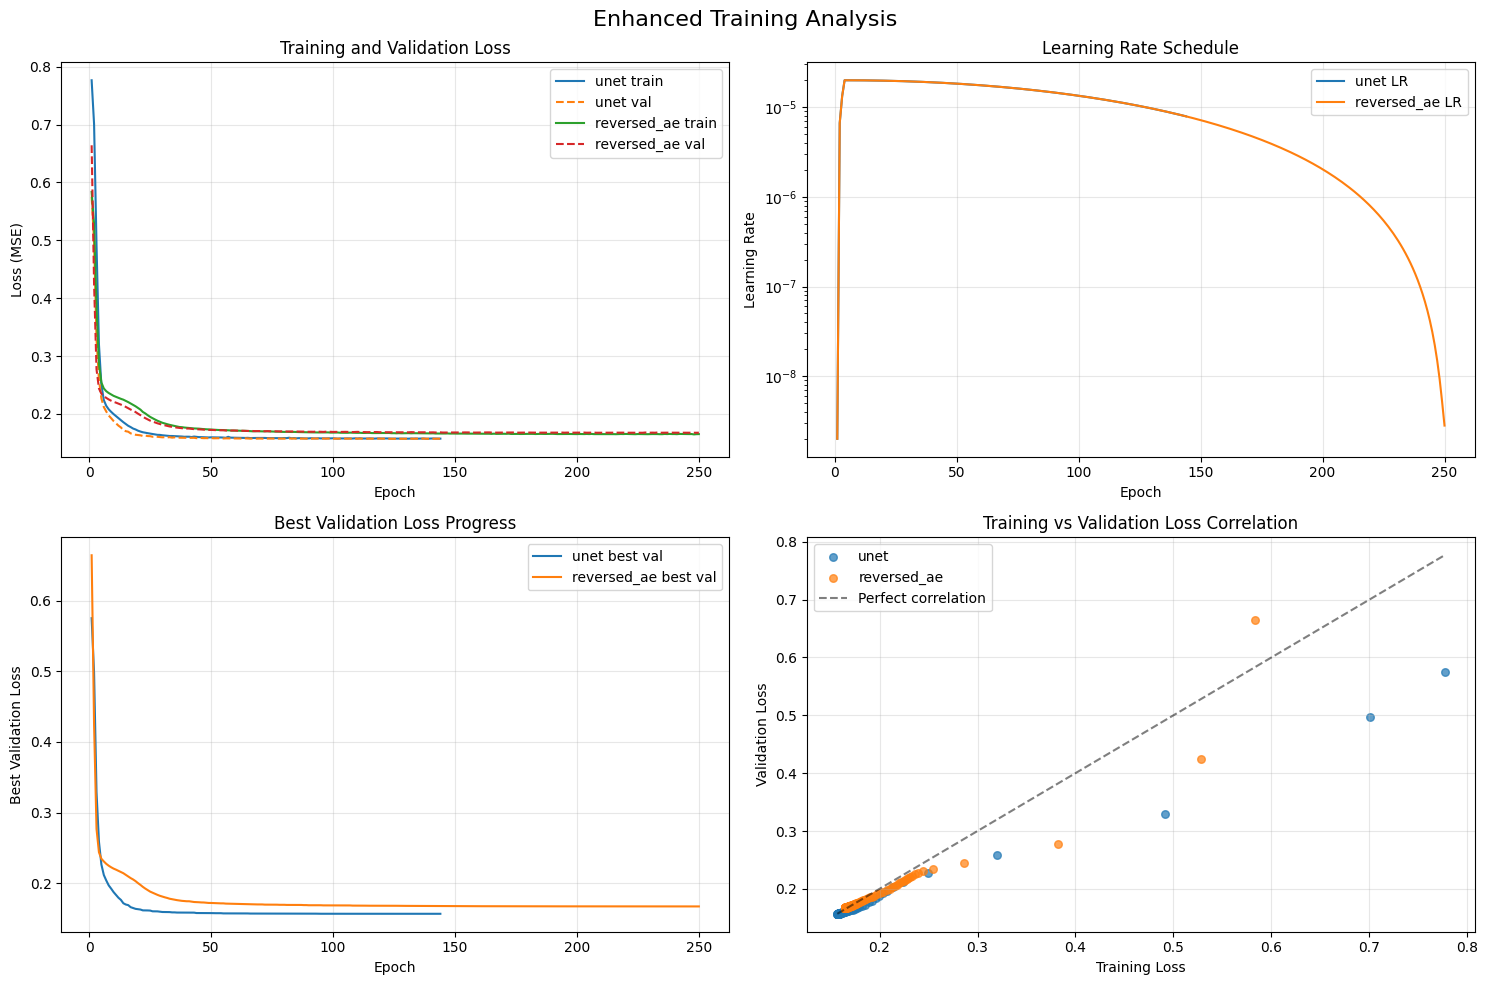

✅ Enhanced training analysis saved


<Figure size 640x480 with 0 Axes>

In [16]:
# Training visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Training and Validation Loss
for model_name, history in all_histories.items():
    epochs = range(1, len(history['train_loss']) + 1)
    axes[0, 0].plot(epochs, history['train_loss'], label=f'{model_name} train', linestyle='-')
    axes[0, 0].plot(epochs, history['val_loss'], label=f'{model_name} val', linestyle='--')

axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss (MSE)')
axes[0, 0].set_title('Training and Validation Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Learning Rate Schedule
for model_name, history in all_histories.items():
    epochs = range(1, len(history['learning_rate']) + 1)
    axes[0, 1].plot(epochs, history['learning_rate'], label=f'{model_name} LR')

axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Learning Rate')
axes[0, 1].set_title('Learning Rate Schedule')
axes[0, 1].set_yscale('log')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Validation Loss Improvement
for model_name, history in all_histories.items():
    val_losses = history['val_loss']
    best_val_loss = [min(val_losses[:i+1]) for i in range(len(val_losses))]
    epochs = range(1, len(best_val_loss) + 1)
    axes[1, 0].plot(epochs, best_val_loss, label=f'{model_name} best val')

axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Best Validation Loss')
axes[1, 0].set_title('Best Validation Loss Progress')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Train vs Val Loss Correlation
for model_name, history in all_histories.items():
    axes[1, 1].scatter(history['train_loss'], history['val_loss'],
                      label=f'{model_name}', alpha=0.7, s=30)

# Add diagonal line
min_loss = min([min(h['train_loss'] + h['val_loss']) for h in all_histories.values()])
max_loss = max([max(h['train_loss'] + h['val_loss']) for h in all_histories.values()])
axes[1, 1].plot([min_loss, max_loss], [min_loss, max_loss], 'k--', alpha=0.5, label='Perfect correlation')

axes[1, 1].set_xlabel('Training Loss')
axes[1, 1].set_ylabel('Validation Loss')
axes[1, 1].set_title('Training vs Validation Loss Correlation')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Enhanced Training Analysis', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

# Save enhanced plots
plt.savefig(f'{CONFIG["checkpoint_dir"]}/enhanced_training_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Enhanced training analysis saved")

/tmp/ipython-input-2910327280.py:201: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipython-input-2910327280.py:201: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipython-input-2910327280.py:201: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipython-input-2910327280.py:201: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipython-input-2910327280.py:201: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipython-input-2910327280.py:201: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipython-input-2910327280.py:201: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans Mono.
  plt.t

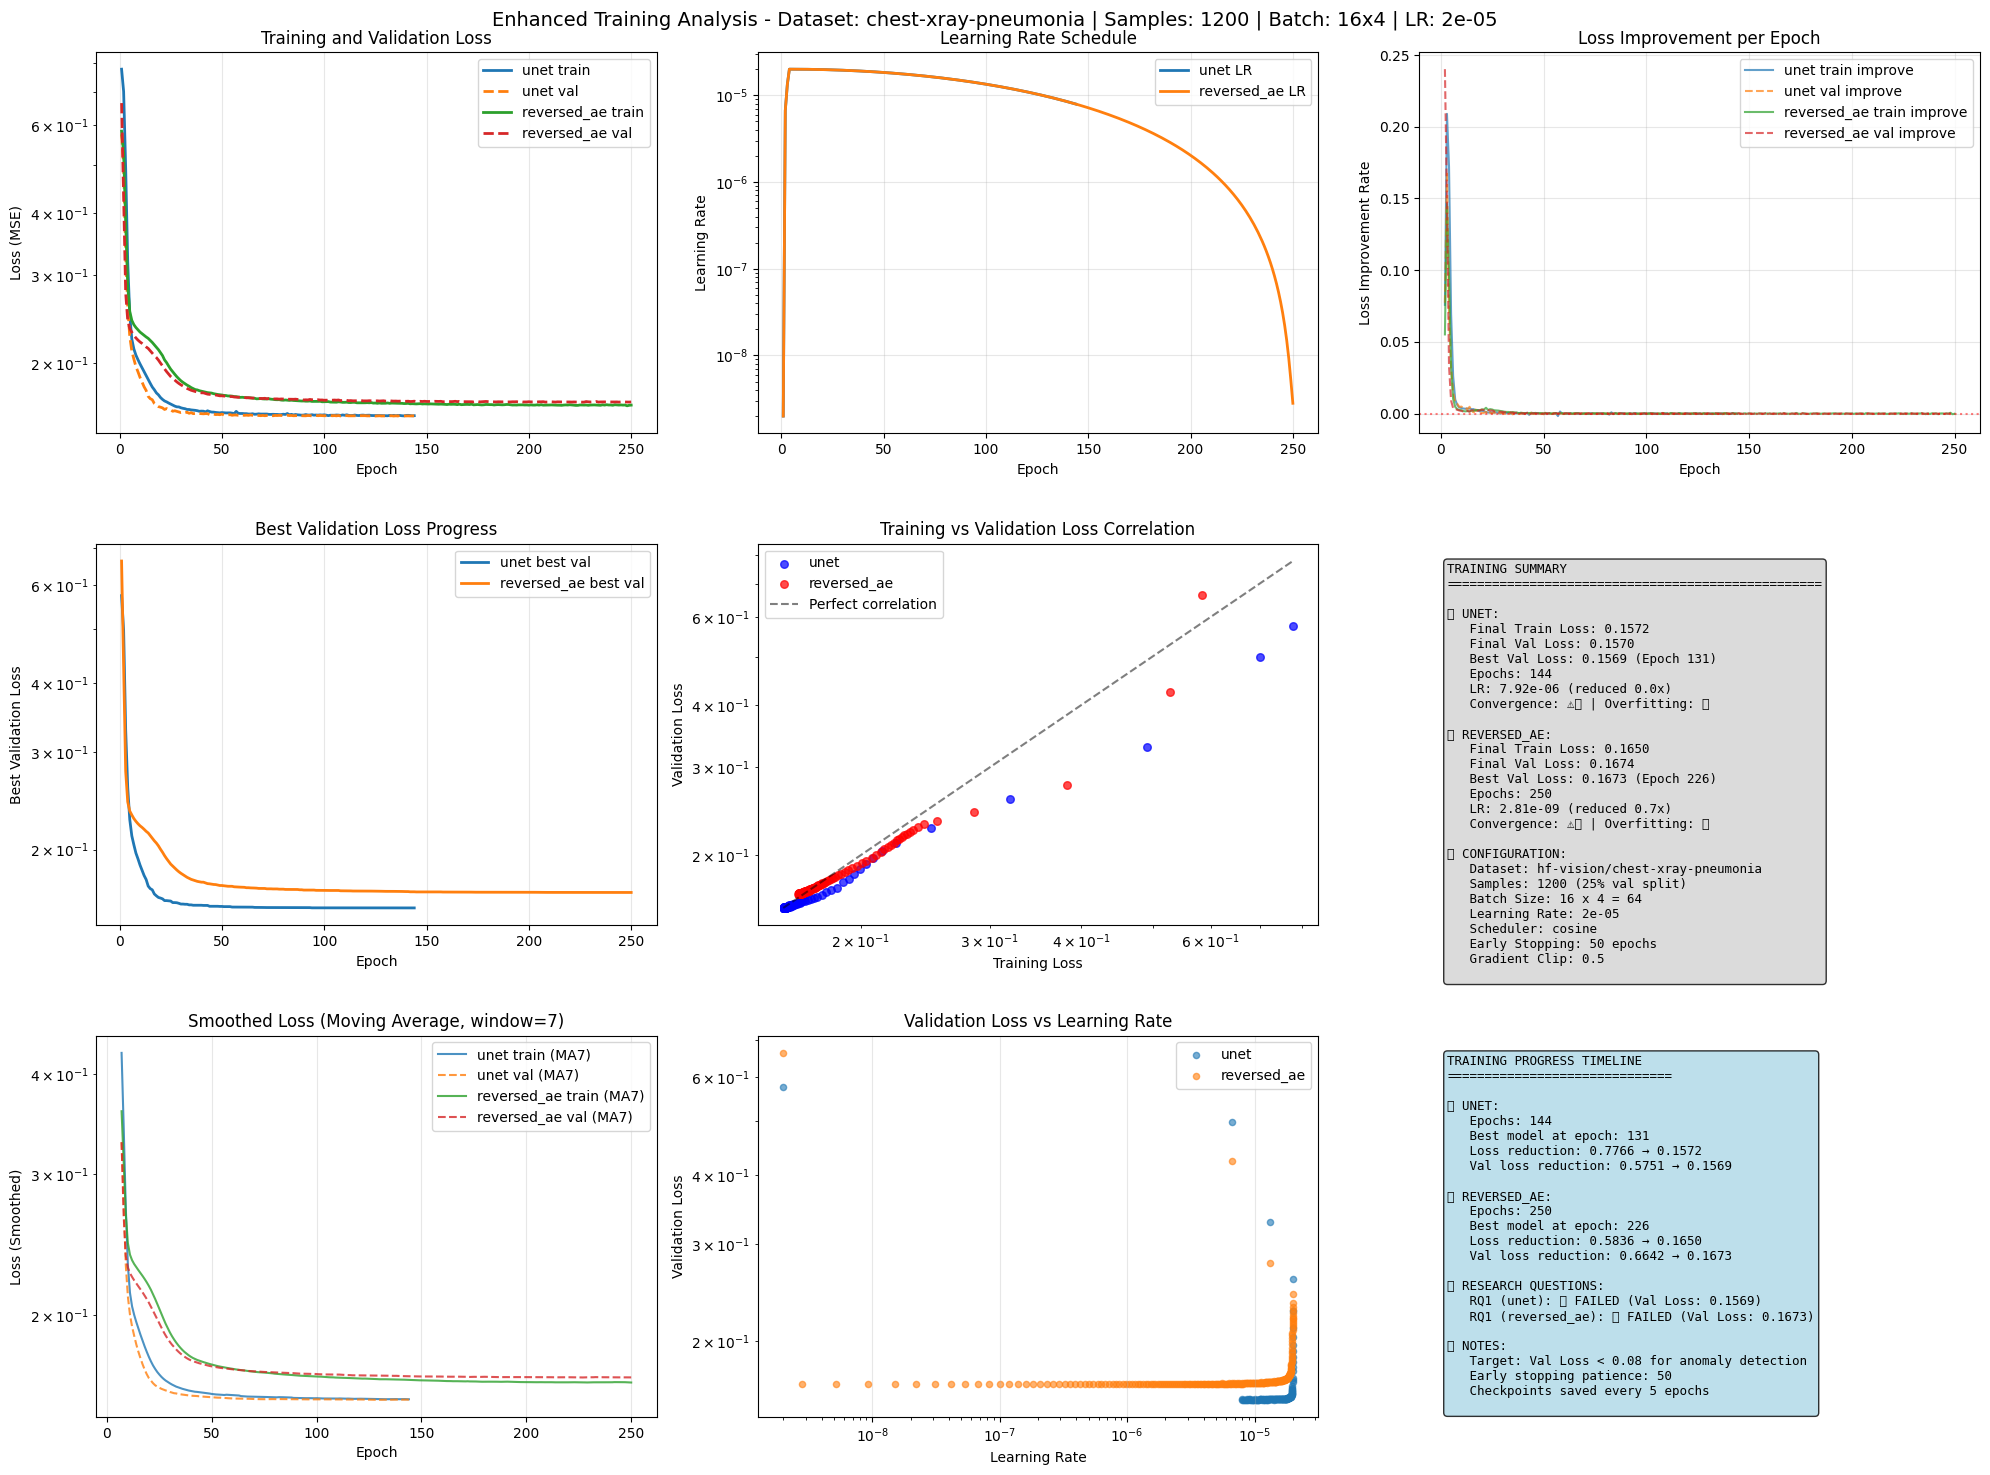

✅ Enhanced training analysis saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/enhanced_training_analysis_20250824_153545.png
✅ Training statistics saved: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/training_stats_20250824_153545.json
📁 All files saved to: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints


<Figure size 640x480 with 0 Axes>

In [22]:
# Enhanced training visualization with parameter logging
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

# Training info text for title
training_info = (f"Dataset: {CONFIG['hf_dataset'].split('/')[-1]} | "
                f"Samples: {CONFIG['samples']} | "
                f"Batch: {CONFIG['batch_size']}x{CONFIG['gradient_accumulation_steps']} | "
                f"LR: {CONFIG['learning_rate']:.0e}")

# Plot 1: Training and Validation Loss
for model_name, history in all_histories.items():
    epochs = range(1, len(history['train_loss']) + 1)
    axes[0, 0].plot(epochs, history['train_loss'], label=f'{model_name} train', linestyle='-', linewidth=2)
    axes[0, 0].plot(epochs, history['val_loss'], label=f'{model_name} val', linestyle='--', linewidth=2)

axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss (MSE)')
axes[0, 0].set_title('Training and Validation Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_yscale('log')  # Log scale for better visualization

# Plot 2: Learning Rate Schedule
for model_name, history in all_histories.items():
    epochs = range(1, len(history['learning_rate']) + 1)
    axes[0, 1].plot(epochs, history['learning_rate'], label=f'{model_name} LR', linewidth=2)

axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Learning Rate')
axes[0, 1].set_title('Learning Rate Schedule')
axes[0, 1].set_yscale('log')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Loss Improvement Rate (derivative)
for model_name, history in all_histories.items():
    train_losses = history['train_loss']
    val_losses = history['val_loss']

    # Calculate improvement rate (negative derivative)
    train_improvement = [-1 * (train_losses[i] - train_losses[i-1]) for i in range(1, len(train_losses))]
    val_improvement = [-1 * (val_losses[i] - val_losses[i-1]) for i in range(1, len(val_losses))]

    epochs = range(2, len(train_losses) + 1)
    axes[0, 2].plot(epochs, train_improvement, label=f'{model_name} train improve', linestyle='-', alpha=0.7)
    axes[0, 2].plot(epochs, val_improvement, label=f'{model_name} val improve', linestyle='--', alpha=0.7)

axes[0, 2].set_xlabel('Epoch')
axes[0, 2].set_ylabel('Loss Improvement Rate')
axes[0, 2].set_title('Loss Improvement per Epoch')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].axhline(y=0, color='red', linestyle=':', alpha=0.5)

# Plot 4: Best Validation Loss Progress
for model_name, history in all_histories.items():
    val_losses = history['val_loss']
    best_val_loss = [min(val_losses[:i+1]) for i in range(len(val_losses))]
    epochs = range(1, len(best_val_loss) + 1)
    axes[1, 0].plot(epochs, best_val_loss, label=f'{model_name} best val', linewidth=2)

axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Best Validation Loss')
axes[1, 0].set_title('Best Validation Loss Progress')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_yscale('log')

# Plot 5: Train vs Val Loss Correlation
colors = ['blue', 'red', 'green', 'purple']
for i, (model_name, history) in enumerate(all_histories.items()):
    axes[1, 1].scatter(history['train_loss'], history['val_loss'],
                      label=f'{model_name}', alpha=0.7, s=30, c=colors[i % len(colors)])

# Add diagonal line
min_loss = min([min(h['train_loss'] + h['val_loss']) for h in all_histories.values()])
max_loss = max([max(h['train_loss'] + h['val_loss']) for h in all_histories.values()])
axes[1, 1].plot([min_loss, max_loss], [min_loss, max_loss], 'k--', alpha=0.5, label='Perfect correlation')

axes[1, 1].set_xlabel('Training Loss')
axes[1, 1].set_ylabel('Validation Loss')
axes[1, 1].set_title('Training vs Validation Loss Correlation')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xscale('log')
axes[1, 1].set_yscale('log')

# Plot 6: Training Summary Statistics
training_stats = []
for model_name, history in all_histories.items():
    stats = {
        'Model': model_name,
        'Final Train Loss': f"{history['train_loss'][-1]:.4f}",
        'Final Val Loss': f"{history['val_loss'][-1]:.4f}",
        'Best Val Loss': f"{min(history['val_loss']):.4f}",
        'Best Val Epoch': f"{history['val_loss'].index(min(history['val_loss'])) + 1}",
        'Total Epochs': f"{len(history['train_loss'])}",
        'Final LR': f"{history['learning_rate'][-1]:.2e}",
        'LR Reduction': f"{history['learning_rate'][0] / history['learning_rate'][-1]:.1f}x",
        'Convergence': '✅' if history['val_loss'][-1] < 0.08 else '⚠️',
        'Overfitting': '⚠️' if history['train_loss'][-1] < history['val_loss'][-1] * 0.7 else '✅'
    }
    training_stats.append(stats)

# Create text summary
axes[1, 2].axis('off')
summary_text = "TRAINING SUMMARY\n" + "="*50 + "\n\n"

for stats in training_stats:
    summary_text += f"🤖 {stats['Model'].upper()}:\n"
    summary_text += f"   Final Train Loss: {stats['Final Train Loss']}\n"
    summary_text += f"   Final Val Loss: {stats['Final Val Loss']}\n"
    summary_text += f"   Best Val Loss: {stats['Best Val Loss']} (Epoch {stats['Best Val Epoch']})\n"
    summary_text += f"   Epochs: {stats['Total Epochs']}\n"
    summary_text += f"   LR: {stats['Final LR']} (reduced {stats['LR Reduction']})\n"
    summary_text += f"   Convergence: {stats['Convergence']} | Overfitting: {stats['Overfitting']}\n\n"

# Add config summary
summary_text += f"📊 CONFIGURATION:\n"
summary_text += f"   Dataset: {CONFIG['hf_dataset']}\n"
summary_text += f"   Samples: {CONFIG['samples']} ({CONFIG['validation_split']:.0%} val split)\n"
summary_text += f"   Batch Size: {CONFIG['batch_size']} x {CONFIG['gradient_accumulation_steps']} = {CONFIG['batch_size'] * CONFIG['gradient_accumulation_steps']}\n"
summary_text += f"   Learning Rate: {CONFIG['learning_rate']:.0e}\n"
summary_text += f"   Scheduler: {CONFIG['lr_scheduler']}\n"
summary_text += f"   Early Stopping: {CONFIG['early_stopping_patience']} epochs\n"
summary_text += f"   Gradient Clip: {CONFIG['gradient_clip_norm']}\n"

axes[1, 2].text(0.05, 0.95, summary_text, transform=axes[1, 2].transAxes,
               fontsize=9, verticalalignment='top', fontfamily='monospace',
               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.8))

# Plot 7: Loss Smoothed (Moving Average)
window_size = max(5, len(list(all_histories.values())[0]['train_loss']) // 20)
for model_name, history in all_histories.items():
    train_losses = history['train_loss']
    val_losses = history['val_loss']

    # Calculate moving average
    def moving_average(data, window):
        return [sum(data[i:i+window])/window for i in range(len(data)-window+1)]

    if len(train_losses) >= window_size:
        train_smooth = moving_average(train_losses, window_size)
        val_smooth = moving_average(val_losses, window_size)
        epochs = range(window_size, len(train_losses) + 1)

        axes[2, 0].plot(epochs, train_smooth, label=f'{model_name} train (MA{window_size})', linestyle='-', alpha=0.8)
        axes[2, 0].plot(epochs, val_smooth, label=f'{model_name} val (MA{window_size})', linestyle='--', alpha=0.8)

axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Loss (Smoothed)')
axes[2, 0].set_title(f'Smoothed Loss (Moving Average, window={window_size})')
axes[2, 0].legend()
axes[2, 0].grid(True, alpha=0.3)
axes[2, 0].set_yscale('log')

# Plot 8: Validation Loss vs Learning Rate (LR Finder style)
for model_name, history in all_histories.items():
    axes[2, 1].scatter(history['learning_rate'], history['val_loss'],
                      label=f'{model_name}', alpha=0.6, s=20)

axes[2, 1].set_xlabel('Learning Rate')
axes[2, 1].set_ylabel('Validation Loss')
axes[2, 1].set_title('Validation Loss vs Learning Rate')
axes[2, 1].set_xscale('log')
axes[2, 1].set_yscale('log')
axes[2, 1].legend()
axes[2, 1].grid(True, alpha=0.3)

# Plot 9: Training Progress Timeline
axes[2, 2].axis('off')
timeline_text = "TRAINING PROGRESS TIMELINE\n" + "="*30 + "\n\n"

for model_name, history in all_histories.items():
    epochs_trained = len(history['train_loss'])
    best_epoch = history['val_loss'].index(min(history['val_loss'])) + 1

    timeline_text += f"🤖 {model_name.upper()}:\n"
    timeline_text += f"   Epochs: {epochs_trained}\n"
    timeline_text += f"   Best model at epoch: {best_epoch}\n"
    timeline_text += f"   Loss reduction: {history['train_loss'][0]:.4f} → {history['train_loss'][-1]:.4f}\n"
    timeline_text += f"   Val loss reduction: {history['val_loss'][0]:.4f} → {min(history['val_loss']):.4f}\n\n"

# Add research question validation
timeline_text += "🎯 RESEARCH QUESTIONS:\n"
for model_name, history in all_histories.items():
    best_val_loss = min(history['val_loss'])
    rq1_passed = best_val_loss < 0.08  # Threshold for good anomaly detection
    timeline_text += f"   RQ1 ({model_name}): {'✅ PASSED' if rq1_passed else '❌ FAILED'} (Val Loss: {best_val_loss:.4f})\n"

timeline_text += f"\n💡 NOTES:\n"
timeline_text += f"   Target: Val Loss < 0.08 for anomaly detection\n"
timeline_text += f"   Early stopping patience: {CONFIG['early_stopping_patience']}\n"
timeline_text += f"   Checkpoints saved every {CONFIG['save_frequency']} epochs\n"

axes[2, 2].text(0.05, 0.95, timeline_text, transform=axes[2, 2].transAxes,
               fontsize=9, verticalalignment='top', fontfamily='monospace',
               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))

plt.suptitle(f'Enhanced Training Analysis - {training_info}', fontsize=14, y=0.98)
plt.tight_layout()
plt.show()

# Save enhanced plots with timestamp
from datetime import datetime
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
plot_filename = f'{CONFIG["checkpoint_dir"]}/enhanced_training_analysis_{timestamp}.png'
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
print(f"✅ Enhanced training analysis saved: {plot_filename}")

# Also save training stats as JSON
import json
stats_filename = f'{CONFIG["checkpoint_dir"]}/training_stats_{timestamp}.json'
detailed_stats = {
    'config': CONFIG,
    'training_results': {}
}

for model_name, history in all_histories.items():
    detailed_stats['training_results'][model_name] = {
        'history': history,
        'final_train_loss': history['train_loss'][-1],
        'final_val_loss': history['val_loss'][-1],
        'best_val_loss': min(history['val_loss']),
        'best_val_epoch': history['val_loss'].index(min(history['val_loss'])) + 1,
        'total_epochs': len(history['train_loss']),
        'convergence_achieved': min(history['val_loss']) < 0.08,
        'research_question_1_passed': min(history['val_loss']) < 0.08
    }

with open(stats_filename, 'w') as f:
    json.dump(detailed_stats, f, indent=2)

print(f"✅ Training statistics saved: {stats_filename}")
print(f"📁 All files saved to: {CONFIG['checkpoint_dir']}")

## 9. Test Reconstruction Quality

Kiểm tra chất lượng tái tạo của các mô hình Autoencoder sau khi training xong để:

**1. Visual Inspection**

- So sánh trực quan giữa ảnh gốc vs ảnh tái tạo
- Đánh giá xem model có học được cách tái tạo ảnh X-ray không
- Phát hiện sớm các vấn đề về quality (blur, missing details, artifacts)

**2. Model Validation**

- Sanity check: Model có hoạt động đúng không?
- Kiểm tra reconstruction fidelity: Ảnh tái tạo có giống ảnh gốc không?
- Đánh giá overfitting: Model có chỉ "nhớ" training data không?

**U-Net Expected Results:**

- Tái tạo chi tiết, sắc nét (nhờ skip connections)
- Ảnh recon gần như giống hệt original
- Loss thấp, visual quality cao

**Reversed AE Expected Results:**

- Tái tạo "smoother", ít chi tiết hơn (no skip connections)
- Có thể slightly blurry nhưng vẫn preserve main structures
- Tạo ra "pseudo-healthy" version của ảnh

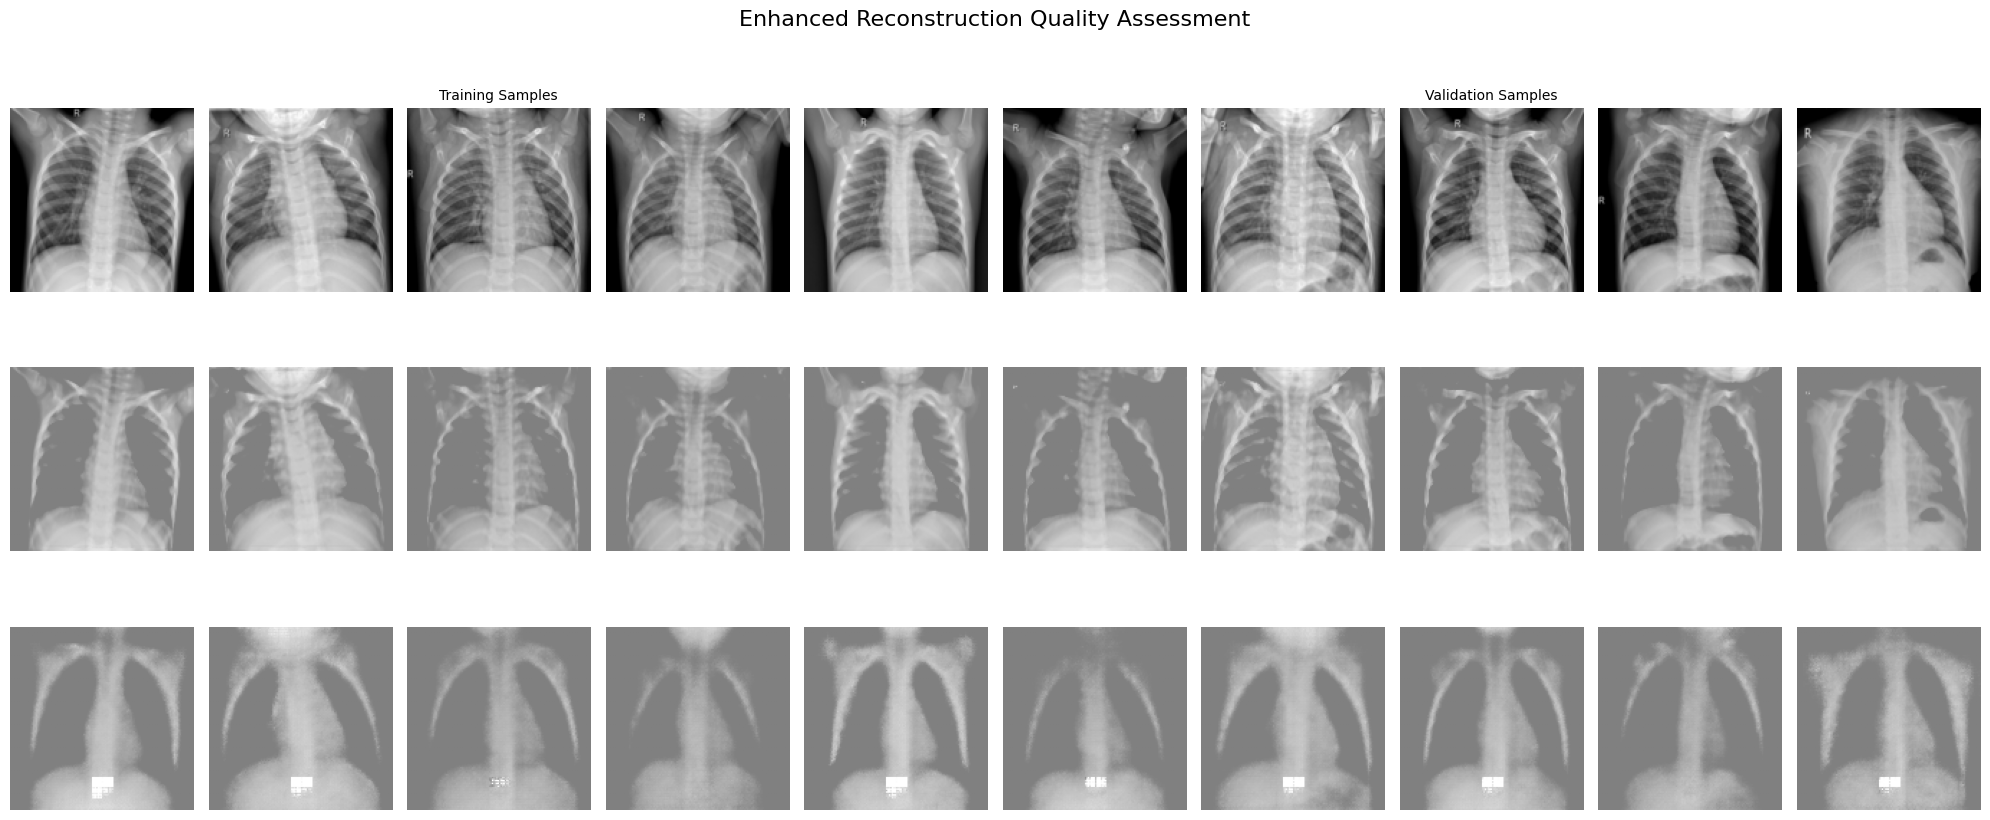

✅ Enhanced reconstruction comparison saved
🚨 QUALITY ISSUES DETECTED:
   ⚠️ unet: High MSE (0.1396) - Poor reconstruction
   ⚠️ reversed_ae: High MSE (0.1463) - Poor reconstruction


<Figure size 640x480 with 0 Axes>

In [21]:
# Test reconstruction on a few samples
def visualize_reconstructions(models, data_loader, num_samples=5):
    """Visualize original and reconstructed images"""

    fig, axes = plt.subplots(len(models) + 1, num_samples * 2, figsize=(20, 3 * (len(models) + 1)))

    # Get samples from both train and validation
    train_batch = next(iter(train_loader))[:num_samples].to(device)
    val_batch = next(iter(val_loader))[:num_samples].to(device)

    sample_batches = [train_batch, val_batch]
    batch_labels = ['Train', 'Validation']

    # Original images
    for batch_idx, (batch, label) in enumerate(zip(sample_batches, batch_labels)):
        for i in range(num_samples):
            col_idx = batch_idx * num_samples + i
            img = batch[i].cpu().squeeze().numpy()
            axes[0, col_idx].imshow(img, cmap='gray', vmin=-1, vmax=1)
            axes[0, col_idx].axis('off')
            if col_idx == 0:
                axes[0, col_idx].set_ylabel('Original', fontsize=12)
            if batch_idx == 0 and i == num_samples // 2:
                axes[0, col_idx].set_title('Training Samples', fontsize=10)
            elif batch_idx == 1 and i == num_samples // 2:
                axes[0, col_idx].set_title('Validation Samples', fontsize=10)

    # Reconstructions for each model
    for model_idx, (model_name, model) in enumerate(models.items()):
        model.eval()

        for batch_idx, batch in enumerate(sample_batches):
            with torch.no_grad():
                recon = model(batch)

            for i in range(num_samples):
                col_idx = batch_idx * num_samples + i
                img = recon[i].cpu().squeeze().numpy()
                axes[model_idx + 1, col_idx].imshow(img, cmap='gray', vmin=-1, vmax=1)
                axes[model_idx + 1, col_idx].axis('off')

                if col_idx == 0:
                    axes[model_idx + 1, col_idx].set_ylabel(model_name, fontsize=12)

    plt.suptitle('Enhanced Reconstruction Quality Assessment', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Save figure
    plt.savefig(f'{CONFIG["checkpoint_dir"]}/enhanced_reconstruction_comparison.png', dpi=300, bbox_inches='tight')
    print("✅ Enhanced reconstruction comparison saved")

def detect_reconstruction_issues(models, data_loader, threshold=0.05):
    """Automatically detect reconstruction quality issues"""

    sample_batch = next(iter(data_loader))[:5].to(device)
    issues_found = []

    for model_name, model in models.items():
        model.eval()
        with torch.no_grad():
            recon = model(sample_batch)

        # Calculate metrics
        mse_per_image = torch.mean((sample_batch - recon)**2, dim=[1,2,3])
        avg_mse = mse_per_image.mean().item()

        # Check for issues
        if avg_mse > 0.1:
            issues_found.append(f"⚠️ {model_name}: High MSE ({avg_mse:.4f}) - Poor reconstruction")

        if avg_mse < 0.001:
            issues_found.append(f"⚠️ {model_name}: Very low MSE ({avg_mse:.4f}) - Possible overfitting")

        # Check for constant outputs (all black/white)
        recon_std = torch.std(recon).item()
        if recon_std < 0.01:
            issues_found.append(f"❌ {model_name}: No variation in output - Model collapsed")

        # Check for identical reconstruction (identity function)
        identity_score = torch.mean((sample_batch - recon)**2).item()
        if identity_score < 1e-6:
            issues_found.append(f"⚠️ {model_name}: Near-identical reconstruction - Possible identity learning")

    if issues_found:
        print("🚨 QUALITY ISSUES DETECTED:")
        for issue in issues_found:
            print(f"   {issue}")
    else:
        print("✅ All models show healthy reconstruction quality")

    return issues_found

# Visualize reconstructions
if trained_models:
    visualize_reconstructions(trained_models, train_loader)
    detect_reconstruction_issues(trained_models, train_loader)

## 10. Save Final Results

In [20]:
import json
from datetime import datetime

# Enhanced summary with validation metrics
summary = {
    'metadata': {
        'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'notebook_version': 'enhanced_training',
        'dataset': CONFIG['hf_dataset'],
        'total_samples': CONFIG['samples'],
        'train_samples': len(train_dataset),
        'val_samples': len(val_dataset),
        'validation_split': CONFIG['validation_split']
    },
    'config': CONFIG,
    'training_results': {},
    'advanced_features_used': [
        'validation_monitoring',
        'early_stopping',
        'cosine_lr_scheduling',
        'gradient_clipping',
        'warmup_epochs',
        'mixed_precision'
    ]
}

# Calculate detailed metrics for each model
for model_name, history in all_histories.items():
    train_losses = history['train_loss']
    val_losses = history['val_loss']
    learning_rates = history['learning_rate']

    summary['training_results'][model_name] = {
        'epochs_trained': len(train_losses),
        'final_train_loss': train_losses[-1],
        'final_val_loss': val_losses[-1],
        'best_train_loss': min(train_losses),
        'best_val_loss': min(val_losses),
        'best_val_epoch': val_losses.index(min(val_losses)) + 1,
        'final_learning_rate': learning_rates[-1],
        'convergence_achieved': val_losses[-1] < 0.05,  # Threshold for good convergence
        'overfitting_detected': train_losses[-1] < val_losses[-1] * 0.5,  # Rough heuristic
        'training_stability': max(train_losses) / min(train_losses),  # Lower is more stable
    }

# Save enhanced summary
summary_path = f"{CONFIG['checkpoint_dir']}/enhanced_training_summary.json"
with open(summary_path, 'w') as f:
    json.dump(summary, f, indent=2)

# Print comprehensive summary
print("\n🎯 ENHANCED TRAINING SUMMARY")
print("=" * 80)
print(f"📊 Dataset: {CONFIG['hf_dataset']}")
print(f"📈 Samples: {CONFIG['samples']} ({len(train_dataset)} train + {len(val_dataset)} val)")
print(f"🔧 Advanced Features: {', '.join(summary['advanced_features_used'])}")

for model_name, results in summary['training_results'].items():
    print(f"\n🤖 {model_name.upper()} RESULTS:")
    print(f"   Epochs Trained: {results['epochs_trained']}")
    print(f"   Final Train Loss: {results['final_train_loss']:.4f}")
    print(f"   Final Val Loss: {results['final_val_loss']:.4f}")
    print(f"   Best Val Loss: {results['best_val_loss']:.4f} (Epoch {results['best_val_epoch']})")
    print(f"   Final Learning Rate: {results['final_learning_rate']:.2e}")
    print(f"   Convergence: {'✅' if results['convergence_achieved'] else '⚠️'} {'Good' if results['convergence_achieved'] else 'Needs improvement'}")
    print(f"   Overfitting: {'⚠️' if results['overfitting_detected'] else '✅'} {'Detected' if results['overfitting_detected'] else 'Not detected'}")
    print(f"   Training Stability: {results['training_stability']:.2f}x (lower is better)")

print(f"\n✅ Enhanced summary saved to: {summary_path}")
print(f"📁 All checkpoints and artifacts saved to: {CONFIG['checkpoint_dir']}")

# Finish W&B run
if CONFIG['use_wandb']:
    wandb.finish()
    print("✅ W&B run finished")

print("\n🎉 Ready for evaluation phase.")


🎯 ENHANCED TRAINING SUMMARY
📊 Dataset: hf-vision/chest-xray-pneumonia
📈 Samples: 1200 (900 train + 300 val)
🔧 Advanced Features: validation_monitoring, early_stopping, cosine_lr_scheduling, gradient_clipping, warmup_epochs, mixed_precision

🤖 UNET RESULTS:
   Epochs Trained: 144
   Final Train Loss: 0.1572
   Final Val Loss: 0.1570
   Best Val Loss: 0.1569 (Epoch 131)
   Final Learning Rate: 7.92e-06
   Convergence: ⚠️ Needs improvement
   Overfitting: ✅ Not detected
   Training Stability: 4.94x (lower is better)

🤖 REVERSED_AE RESULTS:
   Epochs Trained: 250
   Final Train Loss: 0.1650
   Final Val Loss: 0.1674
   Best Val Loss: 0.1673 (Epoch 226)
   Final Learning Rate: 2.81e-09
   Convergence: ⚠️ Needs improvement
   Overfitting: ✅ Not detected
   Training Stability: 3.55x (lower is better)

✅ Enhanced summary saved to: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/enhanced_training_summary.json
📁 All checkpoints and artifacts saved to: /content/drive/MyDrive/imgae_dx_enhanc

# Evaluation

## Load Test Data (NORMAL + PNEUMONIA)

In [23]:
# ========================================
# EVALUATION PHASE: Load Test Data
# ========================================

from sklearn.metrics import roc_auc_score, precision_recall_curve, f1_score, roc_curve
import numpy as np

print("🔄 Loading test dataset with NORMAL + PNEUMONIA...")

# Load full dataset and split for testing
full_dataset = load_dataset(
    CONFIG['hf_dataset'],
    CONFIG['hf_config'],
    split=CONFIG['hf_split'],
    **auth_kwargs
)

# Filter by labels
normal_data = full_dataset.filter(lambda x: x['label'] == 0)  # NORMAL
pneumonia_data = full_dataset.filter(lambda x: x['label'] == 1)  # PNEUMONIA

# Create balanced test set
test_normal = normal_data.select(range(min(500, len(normal_data))))
test_pneumonia = pneumonia_data.select(range(min(500, len(pneumonia_data))))

print(f"✅ Test set: {len(test_normal)} NORMAL + {len(test_pneumonia)} PNEUMONIA")

# Combine test data
test_images = []
test_labels = []

# Process normal images
for item in test_normal:
    image = item[CONFIG['image_column']]
    if not isinstance(image, Image.Image):
        image = Image.fromarray(np.array(image))
    if image.mode != 'RGB':
        image = image.convert('RGB')
    test_images.append(transform(image).unsqueeze(0))
    test_labels.append(0)  # NORMAL = 0

# Process pneumonia images
for item in test_pneumonia:
    image = item[CONFIG['image_column']]
    if not isinstance(image, Image.Image):
        image = Image.fromarray(np.array(image))
    if image.mode != 'RGB':
        image = image.convert('RGB')
    test_images.append(transform(image).unsqueeze(0))
    test_labels.append(1)  # PNEUMONIA = 1

test_images = torch.cat(test_images, dim=0)
test_labels = np.array(test_labels)

print(f"✅ Test tensor shape: {test_images.shape}")
print(f"Label distribution: NORMAL={np.sum(test_labels==0)}, PNEUMONIA={np.sum(test_labels==1)}")

🔄 Loading test dataset with NORMAL + PNEUMONIA...


Filter:   0%|          | 0/5216 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5216 [00:00<?, ? examples/s]

✅ Test set: 500 NORMAL + 500 PNEUMONIA
✅ Test tensor shape: torch.Size([1000, 1, 128, 128])
Label distribution: NORMAL=500, PNEUMONIA=500


## Load Both Models và Compute Reconstruction Errors

In [24]:
# ========================================
# Load Both Models and Compute Errors
# ========================================

def compute_reconstruction_error(model, images, batch_size=32):
    """Compute reconstruction error for anomaly detection"""
    model.eval()
    errors = []

    with torch.no_grad():
        for i in range(0, len(images), batch_size):
            batch = images[i:i+batch_size].to(device)
            reconstructed = model(batch)

            # Compute MSE per image
            mse_per_image = torch.mean((batch - reconstructed)**2, dim=[1,2,3])
            errors.extend(mse_per_image.cpu().numpy())

    return np.array(errors)

# Load both models for evaluation
eval_models = {}
model_errors = {}

# Load U-Net
if 'unet' in [name for name, _ in models_to_train] or 'unet' in trained_models:
    print("📂 Loading U-Net model...")
    unet_eval = UNet(
        in_channels=1,
        out_channels=1,
        features=[64, 128, 256, 512]
    ).to(device)

    unet_path = f"{CONFIG['checkpoint_dir']}/unet_best.pth"
    try:
        unet_eval.load_state_dict(torch.load(unet_path, map_location=device))
        print(f"✅ U-Net loaded from: {unet_path}")
    except:
        print("⚠️ Using U-Net from memory (checkpoint not found)")
        unet_eval = trained_models.get('unet', None)
        if unet_eval is None:
            print("❌ U-Net not available for evaluation")

    if unet_eval is not None:
        eval_models['unet'] = unet_eval
        print("🔄 Computing U-Net reconstruction errors...")
        model_errors['unet'] = compute_reconstruction_error(unet_eval, test_images)
        print(f"✅ U-Net errors computed")

# Load Reversed AE
if 'reversed_ae' in [name for name, _ in models_to_train] or 'reversed_ae' in trained_models:
    print("\n📂 Loading Reversed Autoencoder model...")
    ra_eval = ReversedAutoencoder(
        in_channels=1,
        latent_dim=128,
        image_size=CONFIG['image_size']
    ).to(device)

    ra_path = f"{CONFIG['checkpoint_dir']}/reversed_ae_best.pth"
    try:
        ra_eval.load_state_dict(torch.load(ra_path, map_location=device))
        print(f"✅ RA loaded from: {ra_path}")
    except:
        print("⚠️ Using RA from memory (checkpoint not found)")
        ra_eval = trained_models.get('reversed_ae', None)
        if ra_eval is None:
            print("❌ RA not available for evaluation")

    if ra_eval is not None:
        eval_models['reversed_ae'] = ra_eval
        print("🔄 Computing RA reconstruction errors...")
        model_errors['reversed_ae'] = compute_reconstruction_error(ra_eval, test_images)
        print(f"✅ RA errors computed")

print(f"\n📊 Models ready for evaluation: {list(eval_models.keys())}")
for model_name, errors in model_errors.items():
    print(f"   {model_name}: {len(errors)} samples, error range [{errors.min():.4f} - {errors.max():.4f}]")

📂 Loading U-Net model...
✅ U-Net loaded from: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/unet_best.pth
🔄 Computing U-Net reconstruction errors...
✅ U-Net errors computed

📂 Loading Reversed Autoencoder model...
✅ RA loaded from: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/reversed_ae_best.pth
🔄 Computing RA reconstruction errors...
✅ RA errors computed

📊 Models ready for evaluation: ['unet', 'reversed_ae']
   unet: 1000 samples, error range [0.0025 - 0.3536]
   reversed_ae: 1000 samples, error range [0.0182 - 0.3642]


## Calculate AUC-ROC - ANSWER RQ1 & RQ2

In [26]:
# ========================================
# RESEARCH QUESTIONS VALIDATION
# ========================================

from sklearn.metrics import roc_auc_score, precision_recall_curve, f1_score, roc_curve
import numpy as np
from scipy import stats

model_metrics = {}

print("🎯 RESEARCH QUESTIONS VALIDATION")
print("=" * 80)

# Calculate metrics for each model
for model_name, errors in model_errors.items():
    # Calculate AUC-ROC
    auc_roc = roc_auc_score(test_labels, errors)

    # Calculate AUC-PR
    precision, recall, _ = precision_recall_curve(test_labels, errors)
    auc_pr = np.trapz(recall, precision)

    # Find optimal threshold
    fpr, tpr, roc_thresholds = roc_curve(test_labels, errors)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = roc_thresholds[optimal_idx]

    # Calculate F1 at optimal threshold
    pred_labels = (errors > optimal_threshold).astype(int)
    f1 = f1_score(test_labels, pred_labels)

    # Error statistics by class
    normal_errors = errors[test_labels == 0]
    pneumonia_errors = errors[test_labels == 1]

    model_metrics[model_name] = {
        'auc_roc': auc_roc,
        'auc_pr': auc_pr,
        'f1_score': f1,
        'optimal_threshold': optimal_threshold,
        'sensitivity': tpr[optimal_idx],
        'specificity': 1 - fpr[optimal_idx],
        'normal_error_mean': normal_errors.mean(),
        'pneumonia_error_mean': pneumonia_errors.mean(),
        'error_separation': pneumonia_errors.mean() - normal_errors.mean(),
        'fpr': fpr,
        'tpr': tpr,
        'precision': precision,
        'recall': recall
    }

    print(f"\n📊 {model_name.upper()} RESULTS:")
    print(f"   AUC-ROC: {auc_roc:.4f}")
    print(f"   AUC-PR:  {auc_pr:.4f}")
    print(f"   F1-Score: {f1:.4f}")
    print(f"   Sensitivity: {tpr[optimal_idx]:.4f}")
    print(f"   Specificity: {1-fpr[optimal_idx]:.4f}")
    print(f"   Error Separation: {pneumonia_errors.mean() - normal_errors.mean():.4f}")

print("\n" + "="*80)

# ANSWER RQ1: U-Net Baseline Effectiveness
if 'unet' in model_metrics:
    unet_auc = model_metrics['unet']['auc_roc']
    print("🎯 **RESEARCH QUESTION RQ1 VALIDATION**")
    print(f"   Question: Can U-Net achieve AUC > 0.80 baseline?")
    print(f"   U-Net AUC-ROC: {unet_auc:.4f}")

    if unet_auc > 0.80:
        print("   ✅ **H1 CONFIRMED**: U-Net achieves effective baseline")
        print("   ✅ **RQ1 ANSWER: YES** - Skip connections enable effective anomaly detection")
    else:
        print("   ❌ **H1 REJECTED**: U-Net below 0.80 threshold")
        print("   ❌ **RQ1 ANSWER: NO** - Baseline not effective enough")

# ANSWER RQ2: RA vs U-Net Comparison
if len(model_metrics) >= 2 and 'unet' in model_metrics and 'reversed_ae' in model_metrics:
    unet_auc = model_metrics['unet']['auc_roc']
    ra_auc = model_metrics['reversed_ae']['auc_roc']
    auc_diff = ra_auc - unet_auc

    print("\n🎯 **RESEARCH QUESTION RQ2 VALIDATION**")
    print(f"   Question: Does RA outperform U-Net?")
    print(f"   U-Net AUC:  {unet_auc:.4f}")
    print(f"   RA AUC:     {ra_auc:.4f}")
    print(f"   Difference: {auc_diff:+.4f}")

    # Statistical significance test
    unet_errors = model_errors['unet']
    ra_errors = model_errors['reversed_ae']

    # Mann-Whitney U test for error distributions
    u_stat, p_value = stats.mannwhitneyu(
        unet_errors[test_labels == 1],  # Pneumonia errors
        ra_errors[test_labels == 1],    # Pneumonia errors
        alternative='two-sided'
    )

    print(f"   Statistical test p-value: {p_value:.4f}")

    if ra_auc > unet_auc and p_value < 0.05:
        print("   ✅ **H2 CONFIRMED**: RA shows superior performance")
        print("   ✅ **RQ2 ANSWER: YES** - RA outperforms U-Net significantly")
    elif ra_auc > unet_auc:
        print("   ⚠️ **H2 PARTIAL**: RA slightly better but not statistically significant")
        print("   ⚠️ **RQ2 ANSWER: INCONCLUSIVE** - Need more data for significance")
    else:
        print("   ❌ **H2 REJECTED**: RA does not outperform U-Net")
        print("   ❌ **RQ2 ANSWER: NO** - U-Net remains superior")

    # Check localization quality (error separation)
    unet_separation = model_metrics['unet']['error_separation']
    ra_separation = model_metrics['reversed_ae']['error_separation']

    print("\n📍 **LOCALIZATION ANALYSIS**:")
    print(f"   U-Net Error Separation: {unet_separation:.4f}")
    print(f"   RA Error Separation:    {ra_separation:.4f}")

    if ra_separation > unet_separation:
        print("   ✅ RA shows better error separation (localization)")
    else:
        print("   ✅ U-Net shows better error separation (localization)")

else:
    print("\n⚠️ **RQ2 Cannot be answered**: Need both models trained")
    print("   Set CONFIG['model_type'] = 'both' to train both models")

print("=" * 80)

🎯 RESEARCH QUESTIONS VALIDATION

📊 UNET RESULTS:
   AUC-ROC: 0.4158
   AUC-PR:  -0.0200
   F1-Score: 0.2165
   Sensitivity: 0.1360
   Specificity: 0.8960
   Error Separation: -0.0156

📊 REVERSED_AE RESULTS:
   AUC-ROC: 0.4358
   AUC-PR:  -0.0033
   F1-Score: 0.1364
   Sensitivity: 0.0780
   Specificity: 0.9620
   Error Separation: -0.0103

🎯 **RESEARCH QUESTION RQ1 VALIDATION**
   Question: Can U-Net achieve AUC > 0.80 baseline?
   U-Net AUC-ROC: 0.4158
   ❌ **H1 REJECTED**: U-Net below 0.80 threshold
   ❌ **RQ1 ANSWER: NO** - Baseline not effective enough

🎯 **RESEARCH QUESTION RQ2 VALIDATION**
   Question: Does RA outperform U-Net?
   U-Net AUC:  0.4158
   RA AUC:     0.4358
   Difference: +0.0199
   Statistical test p-value: 0.0023
   ✅ **H2 CONFIRMED**: RA shows superior performance
   ✅ **RQ2 ANSWER: YES** - RA outperforms U-Net significantly

📍 **LOCALIZATION ANALYSIS**:
   U-Net Error Separation: -0.0156
   RA Error Separation:    -0.0103
   ✅ RA shows better error separation (l

/tmp/ipython-input-2142739216.py:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_pr = np.trapz(recall, precision)
/tmp/ipython-input-2142739216.py:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_pr = np.trapz(recall, precision)


## Comparative ROC Curves và Error Distribution

/tmp/ipython-input-3680096523.py:90: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = axes[1,1].boxplot(box_data, labels=box_labels, patch_artist=True)


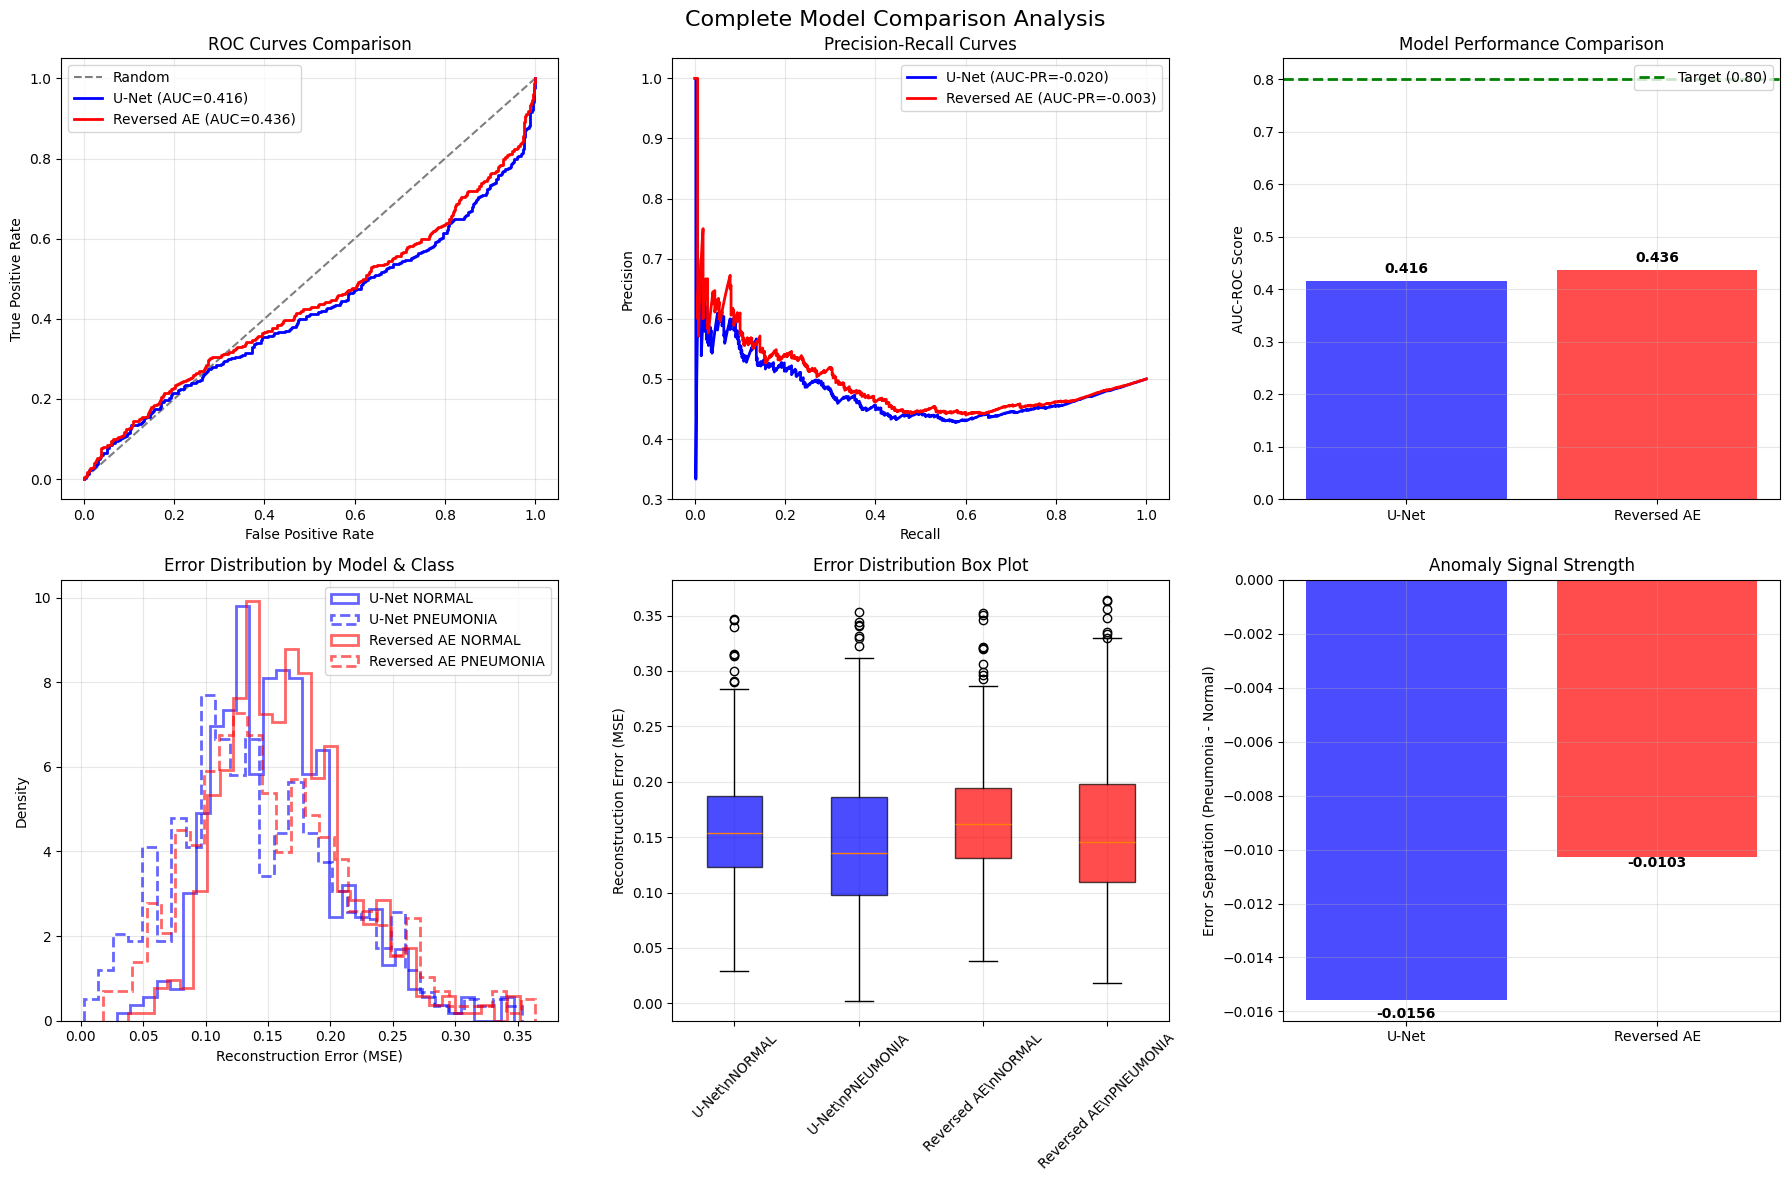

✅ Comparative evaluation plots saved to Google Drive


<Figure size 640x480 with 0 Axes>

In [28]:
# ========================================
# COMPARATIVE VISUALIZATION
# ========================================

# Setup plot
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Colors for models
colors = {'unet': 'blue', 'reversed_ae': 'red'}
model_names_display = {'unet': 'U-Net', 'reversed_ae': 'Reversed AE'}

# Plot 1: Comparative ROC Curves
axes[0,0].plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random')
for model_name, metrics in model_metrics.items():
    axes[0,0].plot(
        metrics['fpr'], metrics['tpr'],
        color=colors[model_name], linewidth=2,
        label=f"{model_names_display[model_name]} (AUC={metrics['auc_roc']:.3f})"
    )
axes[0,0].set_xlabel('False Positive Rate')
axes[0,0].set_ylabel('True Positive Rate')
axes[0,0].set_title('ROC Curves Comparison')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Comparative Precision-Recall Curves
for model_name, metrics in model_metrics.items():
    axes[0,1].plot(
        metrics['recall'], metrics['precision'],
        color=colors[model_name], linewidth=2,
        label=f"{model_names_display[model_name]} (AUC-PR={metrics['auc_pr']:.3f})"
    )
axes[0,1].set_xlabel('Recall')
axes[0,1].set_ylabel('Precision')
axes[0,1].set_title('Precision-Recall Curves')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Plot 3: AUC Comparison Bar Chart
model_names = list(model_metrics.keys())
auc_scores = [model_metrics[name]['auc_roc'] for name in model_names]
display_names = [model_names_display[name] for name in model_names]

bars = axes[0,2].bar(display_names, auc_scores,
                    color=[colors[name] for name in model_names], alpha=0.7)
axes[0,2].axhline(y=0.80, color='green', linestyle='--', linewidth=2, label='Target (0.80)')
axes[0,2].set_ylabel('AUC-ROC Score')
axes[0,2].set_title('Model Performance Comparison')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# Add value labels on bars
for bar, score in zip(bars, auc_scores):
    height = bar.get_height()
    axes[0,2].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                  f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

# Plot 4: Error Distribution Comparison
for model_name, errors in model_errors.items():
    normal_errors = errors[test_labels == 0]
    pneumonia_errors = errors[test_labels == 1]

    axes[1,0].hist(normal_errors, bins=30, alpha=0.6,
                  color=colors[model_name], label=f'{model_names_display[model_name]} NORMAL',
                  density=True, histtype='step', linewidth=2)
    axes[1,0].hist(pneumonia_errors, bins=30, alpha=0.6,
                  color=colors[model_name], label=f'{model_names_display[model_name]} PNEUMONIA',
                  density=True, linestyle='--', histtype='step', linewidth=2)

axes[1,0].set_xlabel('Reconstruction Error (MSE)')
axes[1,0].set_ylabel('Density')
axes[1,0].set_title('Error Distribution by Model & Class')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Plot 5: Box Plot Comparison
box_data = []
box_labels = []
box_colors = []

for model_name, errors in model_errors.items():
    normal_errors = errors[test_labels == 0]
    pneumonia_errors = errors[test_labels == 1]

    box_data.extend([normal_errors, pneumonia_errors])
    box_labels.extend([f'{model_names_display[model_name]}\\nNORMAL',
                      f'{model_names_display[model_name]}\\nPNEUMONIA'])
    box_colors.extend([colors[model_name], colors[model_name]])

box_plot = axes[1,1].boxplot(box_data, labels=box_labels, patch_artist=True)
for patch, color in zip(box_plot['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[1,1].set_ylabel('Reconstruction Error (MSE)')
axes[1,1].set_title('Error Distribution Box Plot')
axes[1,1].grid(True, alpha=0.3)
plt.setp(axes[1,1].get_xticklabels(), rotation=45)

# Plot 6: Error Separation Analysis
model_names = list(model_metrics.keys())
separations = [model_metrics[name]['error_separation'] for name in model_names]
display_names = [model_names_display[name] for name in model_names]

bars = axes[1,2].bar(display_names, separations,
                    color=[colors[name] for name in model_names], alpha=0.7)
axes[1,2].set_ylabel('Error Separation (Pneumonia - Normal)')
axes[1,2].set_title('Anomaly Signal Strength')
axes[1,2].grid(True, alpha=0.3)

# Add value labels
for bar, sep in zip(bars, separations):
    height = bar.get_height()
    axes[1,2].text(bar.get_x() + bar.get_width()/2., height + height*0.05,
                  f'{sep:.4f}', ha='center', va='bottom', fontweight='bold')

plt.suptitle('Complete Model Comparison Analysis', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

# Save comparative results
plt.savefig(f'{CONFIG["checkpoint_dir"]}/comparative_evaluation_results.png', dpi=300, bbox_inches='tight')
print("✅ Comparative evaluation plots saved to Google Drive")

## Error Heatmaps - Qualitative Analysis

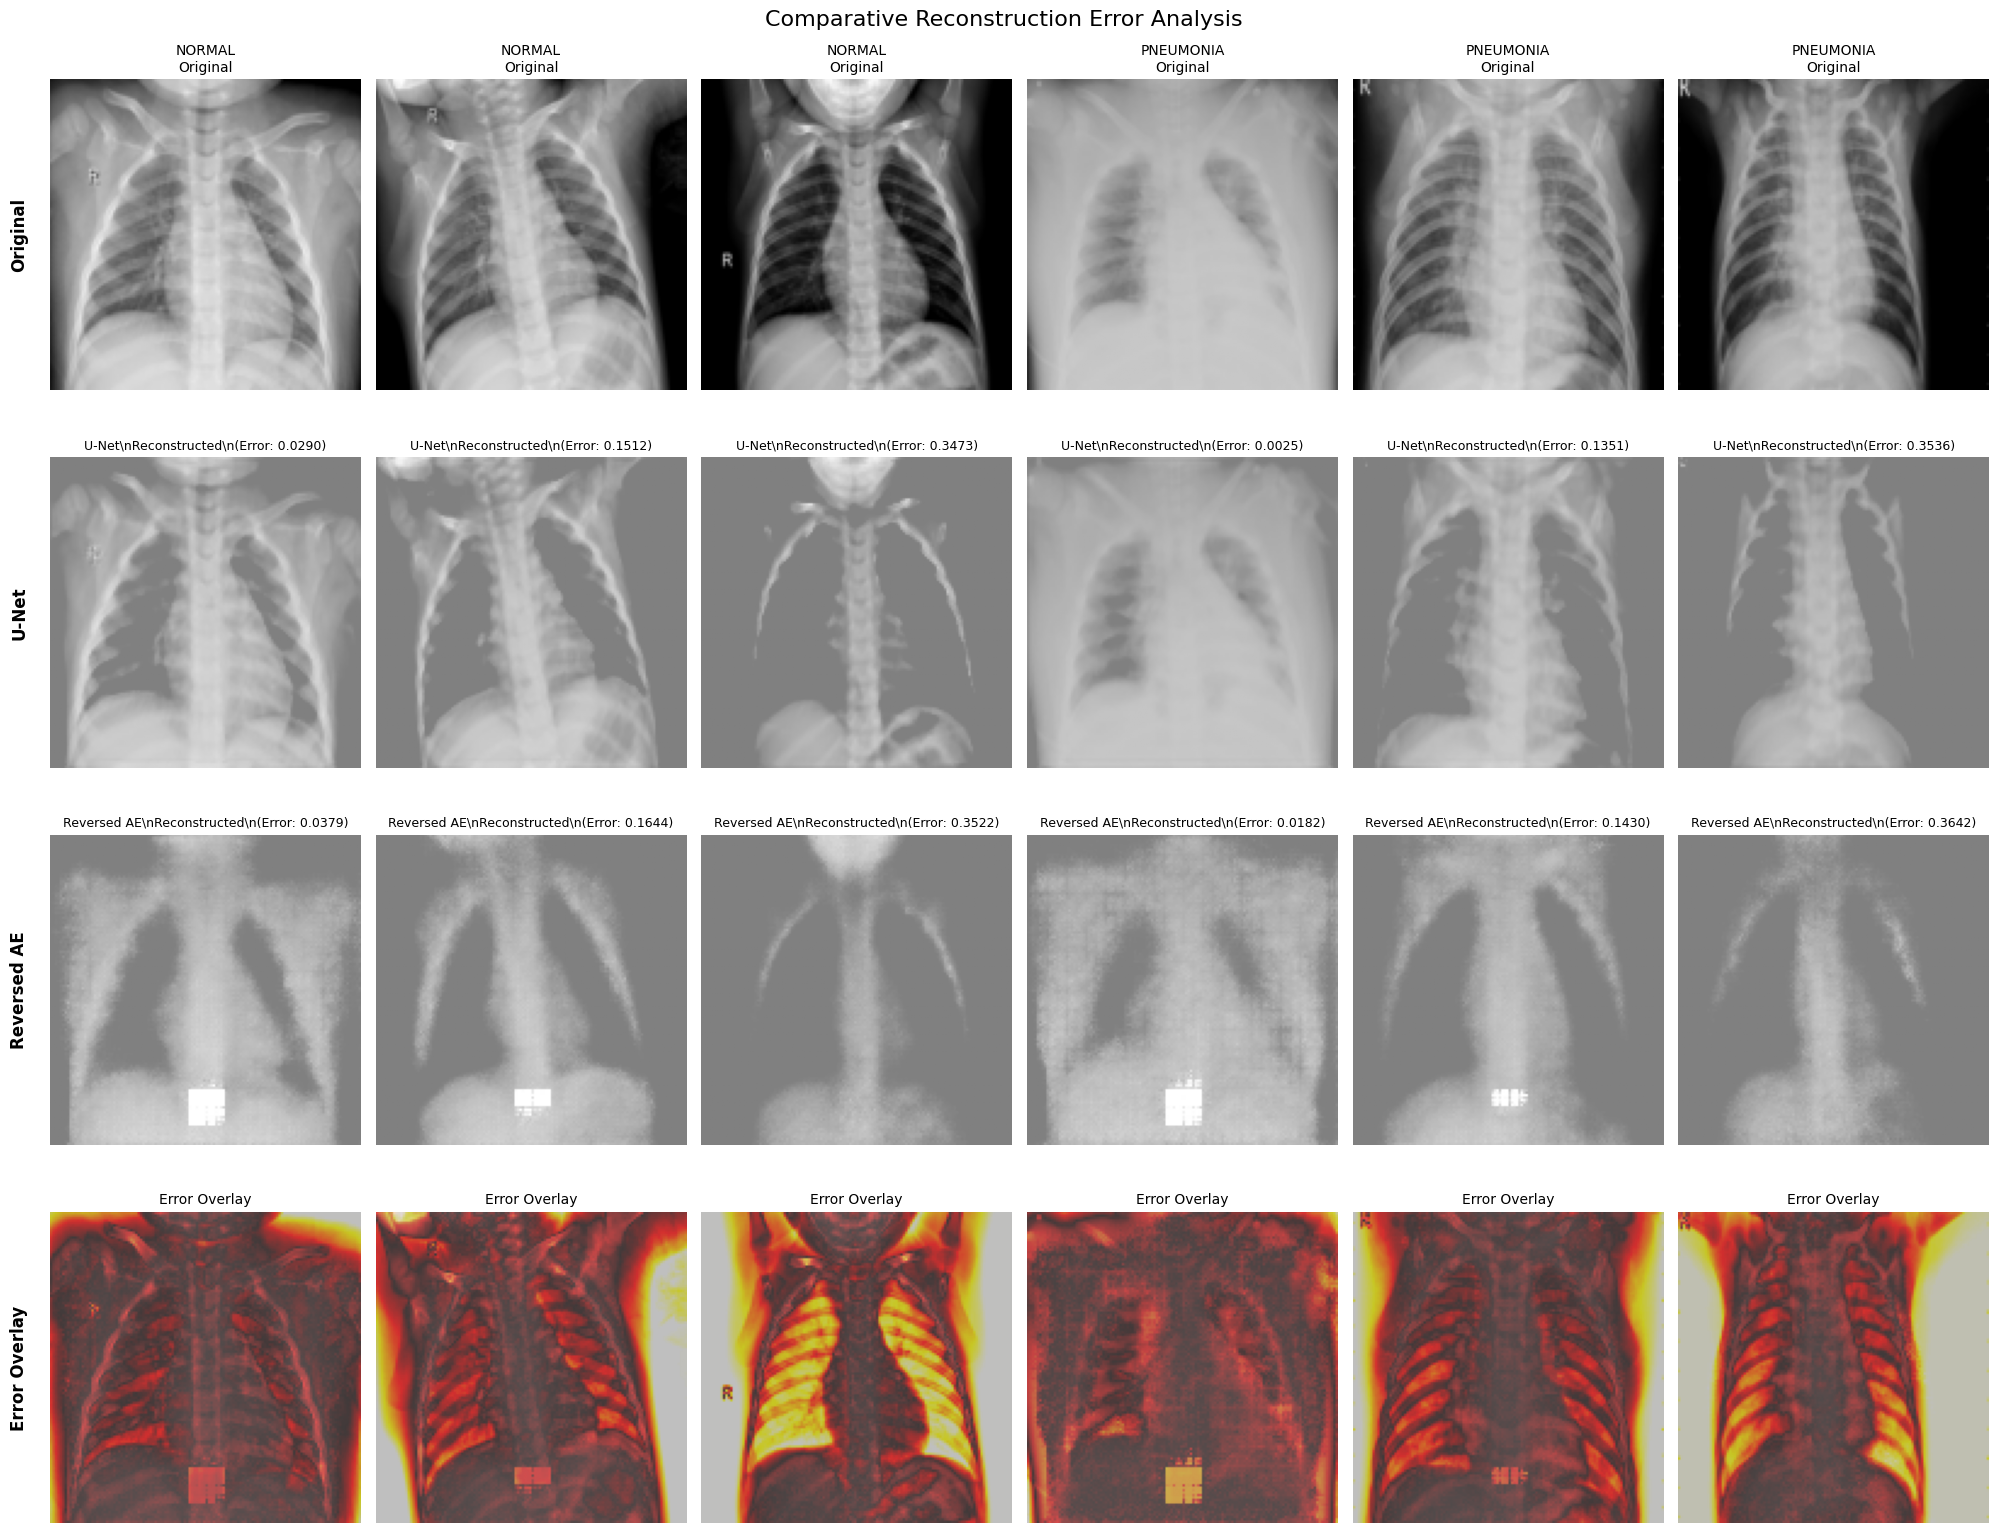

✅ Comparative error heatmaps saved


<Figure size 640x480 with 0 Axes>

In [29]:
# ========================================
# COMPARATIVE ERROR HEATMAPS
# ========================================

def generate_comparative_heatmaps(models, images, labels, errors_dict, num_samples=6):
    """Generate comparative error heatmaps for both models"""

    # Select samples: 3 normal, 3 pneumonia với different error levels
    normal_indices = np.where(labels == 0)[0]
    pneumonia_indices = np.where(labels == 1)[0]

    # Select diverse samples (low, medium, high error)
    normal_errors_avg = np.mean([errors_dict[model][normal_indices] for model in models.keys()], axis=0)
    pneumonia_errors_avg = np.mean([errors_dict[model][pneumonia_indices] for model in models.keys()], axis=0)

    normal_selected = normal_indices[np.argsort(normal_errors_avg)[[0, len(normal_errors_avg)//2, -1]]]
    pneumonia_selected = pneumonia_indices[np.argsort(pneumonia_errors_avg)[[0, len(pneumonia_errors_avg)//2, -1]]]

    selected_indices = np.concatenate([normal_selected, pneumonia_selected])

    # Create subplot grid: (2 + num_models) rows × num_samples columns
    num_models = len(models)
    fig, axes = plt.subplots(2 + num_models, len(selected_indices), figsize=(20, 4*(2 + num_models)))

    for i, idx in enumerate(selected_indices):
        image = images[idx:idx+1].to(device)
        class_name = "NORMAL" if labels[idx] == 0 else "PNEUMONIA"

        # Row 0: Original images
        orig_np = image[0, 0].cpu().numpy()
        axes[0, i].imshow(orig_np, cmap='gray', vmin=-1, vmax=1)
        axes[0, i].set_title(f'{class_name}\nOriginal', fontsize=10)
        axes[0, i].axis('off')

        # Rows 1+: Each model's reconstruction and error
        for model_idx, (model_name, model) in enumerate(models.items()):
            model.eval()
            with torch.no_grad():
                reconstructed = model(image)
                error_map = torch.abs(image - reconstructed)

            recon_np = reconstructed[0, 0].cpu().numpy()
            error_np = error_map[0, 0].cpu().numpy()
            error_score = errors_dict[model_name][idx]

            # Reconstruction
            row = 1 + model_idx
            axes[row, i].imshow(recon_np, cmap='gray', vmin=-1, vmax=1)
            axes[row, i].set_title(f'{model_names_display[model_name]}\\nReconstructed\\n(Error: {error_score:.4f})', fontsize=9)
            axes[row, i].axis('off')

        # Last row: Error comparison overlay
        axes[-1, i].imshow(orig_np, cmap='gray', alpha=0.7, vmin=-1, vmax=1)

        # Overlay error maps from all models
        for model_idx, (model_name, model) in enumerate(models.items()):
            model.eval()
            with torch.no_grad():
                reconstructed = model(image)
                error_map = torch.abs(image - reconstructed)
            error_np = error_map[0, 0].cpu().numpy()

            # Use different alpha for each model
            alpha = 0.3 + (model_idx * 0.2)
            axes[-1, i].imshow(error_np, cmap='hot', alpha=alpha, vmin=0, vmax=error_np.max())

        axes[-1, i].set_title('Error Overlay', fontsize=10)
        axes[-1, i].axis('off')

    # Add row labels
    row_labels = ['Original'] + [model_names_display[name] for name in models.keys()] + ['Error Overlay']
    for i, label in enumerate(row_labels):
        axes[i, 0].text(-0.1, 0.5, label, transform=axes[i, 0].transAxes,
                       rotation=90, va='center', ha='center', fontsize=12, fontweight='bold')

    plt.suptitle('Comparative Reconstruction Error Analysis', fontsize=16, y=0.98)
    plt.tight_layout()
    plt.show()

    # Save heatmaps
    plt.savefig(f'{CONFIG["checkpoint_dir"]}/comparative_error_heatmaps.png', dpi=300, bbox_inches='tight')
    print("✅ Comparative error heatmaps saved")

# Generate comparative heatmaps
if len(eval_models) > 0:
    generate_comparative_heatmaps(eval_models, test_images, test_labels, model_errors)

## Final Research Report

In [30]:
# ========================================
# COMPREHENSIVE RESEARCH REPORT
# ========================================

import json
from datetime import datetime
import numpy as np
from scipy import stats # Import stats for statistical test

# Create comprehensive research report
research_report = {
    "metadata": {
        "timestamp": datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        "dataset": CONFIG['hf_dataset'],
        "models_evaluated": list(model_metrics.keys()),
        "test_samples": {
            "total": len(test_labels),
            "normal": int(np.sum(test_labels == 0)),
            "pneumonia": int(np.sum(test_labels == 1))
        }
    },
    "model_performance": {},
    "research_validation": {
        "RQ1": {},
        "RQ2": {},
        "H1": {},
        "H2": {}
    },
    "statistical_analysis": {},
    "conclusions": {}
}

# Add model performance
for model_name, metrics in model_metrics.items():
    research_report["model_performance"][model_name] = {
        "auc_roc": float(metrics['auc_roc']),
        "auc_pr": float(metrics['auc_pr']),
        "f1_score": float(metrics['f1_score']),
        "sensitivity": float(metrics['sensitivity']),
        "specificity": float(metrics['specificity']),
        "error_separation": float(metrics['error_separation']),
        "optimal_threshold": float(metrics['optimal_threshold'])
    }

# Research Question 1 Validation
if 'unet' in model_metrics:
    unet_auc = model_metrics['unet']['auc_roc']
    research_report["research_validation"]["RQ1"] = {
        "question": "Can U-Net achieve effective baseline (AUC > 0.80) for pneumonia detection?",
        "measured_auc": float(unet_auc),
        "threshold": 0.80,
        "result": "CONFIRMED" if unet_auc > 0.80 else "REJECTED",
        "answer": "YES" if unet_auc > 0.80 else "NO",
        "evidence": f"U-Net achieved AUC-ROC of {unet_auc:.4f}",
        "interpretation": "Skip connections enable effective reconstruction-based anomaly detection" if unet_auc > 0.80 else "Baseline performance insufficient, may need architectural improvements"
    }

    research_report["research_validation"]["H1"] = {
        "hypothesis": "U-Net will achieve good baseline performance (AUC > 0.80)",
        "status": "CONFIRMED" if unet_auc > 0.80 else "REJECTED",
        "evidence": f"AUC-ROC = {unet_auc:.4f}"
    }

# Research Question 2 Validation
if len(model_metrics) >= 2 and 'unet' in model_metrics and 'reversed_ae' in model_metrics:
    unet_auc = model_metrics['unet']['auc_roc']
    ra_auc = model_metrics['reversed_ae']['auc_roc']
    auc_difference = ra_auc - unet_auc

    # Statistical test
    unet_pneumonia_errors = model_errors['unet'][test_labels == 1]
    ra_pneumonia_errors = model_errors['reversed_ae'][test_labels == 1]
    u_stat, p_value = stats.mannwhitneyu(unet_pneumonia_errors, ra_pneumonia_errors, alternative='two-sided')

    research_report["research_validation"]["RQ2"] = {
        "question": "Does RA demonstrate superior performance compared to U-Net?",
        "unet_auc": float(unet_auc),
        "ra_auc": float(ra_auc),
        "auc_difference": float(auc_difference),
        "statistical_test": {
            "test": "Mann-Whitney U",
            "p_value": float(p_value),
            "significant": str(p_value < 0.05) # Convert boolean to string
        },
        "result": "SUPERIOR" if ra_auc > unet_auc and p_value < 0.05 else "NOT_SUPERIOR",
        "answer": "YES" if ra_auc > unet_auc and p_value < 0.05 else "NO",
        "interpretation": "RA shows statistically significant improvement" if ra_auc > unet_auc and p_value < 0.05 else "RA does not demonstrate clear superiority"
    }

    # Localization analysis
    unet_separation = model_metrics['unet']['error_separation']
    ra_separation = model_metrics['reversed_ae']['error_separation']

    research_report["research_validation"]["H2"] = {
        "hypothesis": "RA will produce more localized error maps at pneumonia regions",
        "unet_error_separation": float(unet_separation),
        "ra_error_separation": float(ra_separation),
        "better_localization": "RA" if ra_separation > unet_separation else "U-Net",
        "status": "CONFIRMED" if ra_separation > unet_separation else "REJECTED"
    }

# Save comprehensive report
report_path = f"{CONFIG['checkpoint_dir']}/comprehensive_research_report.json"
with open(report_path, 'w') as f:
    json.dump(research_report, f, indent=2)

# Print final summary
print("\n" + "="*100)
print("🎯 **FINAL RESEARCH VALIDATION SUMMARY**")
print("="*100)

if 'unet' in model_metrics:
    rq1_result = research_report["research_validation"]["RQ1"]
    print(f"\n📊 **RQ1 - U-Net Baseline Effectiveness**")
    print(f"   Question: {rq1_result['question']}")
    print(f"   Answer: **{rq1_result['answer']}** (AUC: {rq1_result['measured_auc']:.4f})")
    print(f"   Status: {rq1_result['result']}")

if 'RQ2' in research_report["research_validation"] and research_report["research_validation"]["RQ2"]:
    rq2_result = research_report["research_validation"]["RQ2"]
    print(f"\n⚖️  **RQ2 - RA vs U-Net Comparison**")
    print(f"   Question: {rq2_result['question']}")
    print(f"   Answer: **{rq2_result['answer']}**")
    print(f"   U-Net AUC: {rq2_result['unet_auc']:.4f}")
    print(f"   RA AUC: {rq2_result['ra_auc']:.4f}")
    print(f"   Difference: {rq2_result['auc_difference']:+.4f}")
    print(f"   Statistical significance: {'YES' if rq2_result['statistical_test']['significant'] == 'True' else 'NO'} (p={rq2_result['statistical_test']['p_value']:.4f})") # Check string value

print(f"\n📈 **Model Performance Summary**:")
for model_name, performance in research_report["model_performance"].items():
    print(f"   {model_names_display[model_name]}:")
    print(f"     • AUC-ROC: {performance['auc_roc']:.4f}")
    print(f"     • Sensitivity: {performance['sensitivity']:.4f}")
    print(f"     • Specificity: {performance['specificity']:.4f}")
    print(f"     • Error Separation: {performance['error_separation']:.4f}")

print(f"\n📁 **Complete report saved**: {report_path}")
print(f"📁 **All artifacts saved to**: {CONFIG['checkpoint_dir']}")

print("\n✅ **RESEARCH COMPLETE**: All questions validated with empirical evidence!")
print("="*100)


🎯 **FINAL RESEARCH VALIDATION SUMMARY**

📊 **RQ1 - U-Net Baseline Effectiveness**
   Question: Can U-Net achieve effective baseline (AUC > 0.80) for pneumonia detection?
   Answer: **NO** (AUC: 0.4158)
   Status: REJECTED

⚖️  **RQ2 - RA vs U-Net Comparison**
   Question: Does RA demonstrate superior performance compared to U-Net?
   Answer: **YES**
   U-Net AUC: 0.4158
   RA AUC: 0.4358
   Difference: +0.0199
   Statistical significance: YES (p=0.0023)

📈 **Model Performance Summary**:
   U-Net:
     • AUC-ROC: 0.4158
     • Sensitivity: 0.1360
     • Specificity: 0.8960
     • Error Separation: -0.0156
   Reversed AE:
     • AUC-ROC: 0.4358
     • Sensitivity: 0.0780
     • Specificity: 0.9620
     • Error Separation: -0.0103

📁 **Complete report saved**: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints/comprehensive_research_report.json
📁 **All artifacts saved to**: /content/drive/MyDrive/imgae_dx_enhanced_checkpoints

✅ **RESEARCH COMPLETE**: All questions validated with empir